# Pho Rowland Sentiment Analysis

**Author: Anthony Tian**

**Date: May 7th, 2025**

___

In [107]:
import requests
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
from io import StringIO
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.cm as cm
from collections import defaultdict, Counter

In [5]:
warnings.filterwarnings('ignore')

___

**Functions:**

In [7]:
def get_chrome_driver():
    options = webdriver.ChromeOptions()
    # options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
    return webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [8]:
def scrape_yelp_reviews(driver, url, timeout=10):
    driver.get(url)
    try:
        WebDriverWait(driver, timeout).until(
            EC.presence_of_element_located((By.XPATH, '//p[contains(@class, "comment__09f24__")]//span[contains(@class, "raw__09f24__")]'))
        )
    except:
        print("Timed out waiting for review spans to load!")
        return []
    span_elements = driver.find_elements(By.XPATH, '//p[contains(@class, "comment__09f24__")]//span[contains(@class, "raw__09f24__")]')
    reviews = [span.get_attribute('innerText').strip() for span in span_elements]
    return reviews

In [9]:
def print_reviews(reviews):
    for idx, review in enumerate(reviews):
        print(f"Review {idx+1}: {review}")

In [10]:
def save_reviews_to_csv(reviews, filename='reviews.csv'):
    df = pd.DataFrame({'review': reviews})
    df.to_csv(filename, index=False)
    print(f"Saved {len(reviews)} reviews to {filename}")

**Scraping Yelp Reviews**

urls = ['https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights'
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=10'
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=20',
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=30',
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=40',
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=50',
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=60',
        'https://www.yelp.com/biz/pho-rowland-restaurant-rowland-heights?start=70']

all_reviews = []
for u in urls:
    all_reviews.extend(scrape_yelp_reviews(driver, u))

driver = get_chrome_driver()
reviews = scrape_yelp_reviews(driver, url)
print_reviews(reviews)
save_reviews_to_csv(reviews)
driver.quit()

Manual Dataframe (in case ant-scraping measures are frustrating):

In [16]:
reviews_df = pd.DataFrame({'review': [
    """This place was so good! I came here with a friend at 8pm on a Monday night so it was empty except for me. The place is well lit and extremely spacious.

I ordered the egg rolls, a large combo pho(+beef balls), the banh xeo, and a side of grilled pork. Food came extremely fast.

Those fried egg rolls are incredible. So crispy with the perfect amount of filling.

The combo pho was huge with the noodles perfectly cooked and the beef not overcooked like a lot of places tend to do it.

By the time the banh xeo came, I was pretty full even though I was splitting it with my friend. The shell was super crispy and there was a lot of bean sprouts in there which is the way I like my banh xeo.

Definitely would recommend this place! Prices are super reasonable. I would definitely be back when I'm in the area!""",
    """Pretty solid place to get Vietnamese food! I ordered the bun rieu and I personally thought the broth was a bit bland and I wish I had gotten a rice dish instead but to be fair I like when the soup is more pungent. It's great for people who are unfamiliar with that specific dish and want to try it, though! It also came with a lot of protein and the perfect amount of noodles. As for the pho, my boyfriend ordered it and he said it was really good!

It was moderately busy when I went on a Sunday afternoon but we didn't have to wait for a table. The service was quick and they have a lot of options on the menu if you're feeling soupy, dry, rice, noodles, or even something else. It's located in the same plaza as a lot of other popular business (Chicha San Chen, Sun Nong Dan, etc) so it might be a bit difficult to find parking even though there are a lot of spots. Definitely worth a try!""",
    """Pho prices are getting out of hand. $17 for 3 bites of noodles and measly pieces of meat? $16 for 5 egg rolls? If you have a big appetite, prepare to be broke after your meal. Dined in on a Thursday around 6-6:30pm. Only 2 other parties in the restaurant. I know the economy is bad and everything is expensive but these prices gotta go. This used to be my go to spot in 2015-2019 but I don't think I'll be back. Can't justify a bowl of pho setting me back $20.

Pho 45 in La habra is good with big portions and reasonable prices. Always busy there but too bad it's a little far. Somebody open a decently priced pho place in the Rowland heights area, I promise business will be very good!

P.S. their recent 5 star reviews are looking a little suspicious.. very short and nonspecific with fake looking profiles.. not sure if they're offering some sort of incentive for writing 5 star reviews but it not a good look. I knew someone who had a side hustle of writing fake Yelp reviews for businesses. It's out there and still happening people!""",
    """This Vietnamese restaurant is excellent! This is our first visit. My impression of the restaurant is very neat and clean. Their service is great and efficient! The food is delicious! Everything we ordered from their crispy egg rolls to Rib Eye & Brisket Pho to their Pork Chop rice are all very good!!! Will definitely come back and highly recommend if you are in the Rowland Heights vicinity.""",
    """Came here after a rainy day & it hit the spot! It was so comforting & filling. We came in around 9pm and we're seated immediately. We tried their chicken pho which came with a generous portion of chicken. My boyfriend even joked by saying "They gave us a whole chicken in the soup" LOL. We accompanied our pho with some spring rolls. The spring rolls came out fresh & savory. We also tried their Thai tea & jasmine tea which tasted authentic & flavorful. Overall a great spot, hope to come back soon. :)""",
    """I was looking for Pho restaurant that has Bun Bo Hue..tried couple of other places and it was not as good as how it supposed to be. So happy that now I finally found a place for my fav Bun Bo Hue!!!!! I did takeout last weekend and it literally hit the spot! On top of that..I ordered summer roll (It was gone before I realized to take a picture) you know its a legit Vietnamese restaurant if they have the pork meatball spring rolls. So delicious!!!! So glad I finally found my fav. Vietnamese restaurant in town!!!!!!!""",
    """Bomb Pho in Rowland Hts! I tried Pho here for the first time many many many moons ago. I came back after Pho Ha closed down and I needed a Pho fix....

My go to is the Pho Thai and everything about it was great. The beef broth had a nice taste but importantly the beef itself was great quality!

It hit the spot - dare I say even better than Pho Ha?""",
    """The service is great and fast here.
I'm always on the lookout for authentic tasting Bun Bo Hue and I have to say this place makes a really good one! I'm so happy to have discovered it here.
Can be a bit noisy but doesn't take away from food quality.
My friend ordered Pho and the broth was really good too!""",
    """Pho Rowland Restaurant is still our favorite Vietnamese Restaurant in Rowland Heights.
We ordered the following items today:
-#49 Bun Rieu (crab meat, shrimp & pork w/ vermicelli soup) $17.50
-#19 Pho Dac Biet (Special Combo w/ ribeye steak, tendon, tripe & brisket) $16.25
-#60 Com Bi Cha Suon (shredded pork, egg loaf & grilled pork chop) $17
-#1 Cha Gio (crispy egg rolls w/ pork, vegetables & fish sauce) 5 pcs $16
-#18 Soda Lemonade/Pickled lemon/Pickled Plum $6
-#16 Vietnamese coffee w/ condensed milk $6

Our appetizer Cha Gio (crispy egg rolls with pork and veggies) came out first. They looked very appealing and crispy. The egg rolls were big, with veggies and some rice noodles to wrap with. They made it fresh so they were very hot when served on the table. They were so delicious and as good as Golden Deli.

The Pho Dac Biet (A special combo with ribeye steak, tendon, tripe & brisket) was flavorful and the soup was not too salty. The ribeye steak meat was very tender and had a lot of tendon, trip & brisket. The portion was decent.

Com Bi Cha Suon (shredded pork, egg loaf & grilled pork chop).
The grilled pork chop tasted flavorful but it was a bit dry. The egg loaf and shredded pork were also yummy.

The Crab meat, shrimp & pork with vermicelli soup was very addictive. This is a traditional Vietnamese soup with a flavorful broth flavored with tomatoes, shrimp paste, fish sauce, and a meat broth. The taste was on point.

The prices are a little pricey compared to other Vietnamese restaurants in the area. Total was $86 for 3 adults (plus tips). They even charged $0.25 for the take-out boxes. The food was consistently good. Service was friendly and attentive.""",
    """We ordered the pho tai and bun with grilled pork. The broth flavorful and not too salty. The noodles were a little too soft for me and wish they gave a little more beef slices.

The vermicelli (bun) with pork pork was delicious and the pork had a nice hint of char flavored. Service is good. Overall pretty good restaurant if youre craving some Viet food around the area.""",
    """The food is super great. Specifically their Pho. The broth is really tasty with quality meat. We always finish the whole bowl with the broth as well.
Their service is always great. They make you feel like a family here.
We always feel so welcomed when we come here. The ambiance is always nice and the restaurant is always look clean.
I really recommend this place when you are looking for good Vietnamese food.""",
    """Food:
They have pretty decent banh xeo and pho. I went when I was really hungry and these both were flavorful dishes! I loved how crispy the banh xeo was.

Service:
Pretty quick and nice!

Ambiance:
Average size place with some people eating. Nothing too fancy but very comfortable. It's pretty clean too.""",
    """I found this place because my old shop was shut down !!! I really enjoy how they have beef options to substitute me for my pork. I do not eat pork. The service is pretty fast and reliable although there was this one time where I found a hair in my food and I was so upset, but what they did was they tried to pay for my meal. I wasn't gonna let that happen because I love this place so much. It's a little tiny in there and when it's cold and rainy it gets packed fast. I love this pho restaurant.""",
    """My favorite Pho in the WeCo area! The broth is delicious with a delicate herbal flavor that instantly lifts my spirits. The noodles are silky with just the right amount of chew, and the beef is always perfectly tender. Plus, they have actual chili oil on the table, not just sriracha! The service is friendly as well - perfect for a cold winter night.""",
    """Food is okay same other pho nothing special
Egg rolls 5 pcs for $ 16 for me is over price nothing special
Service non existent never check on me ask for if I need anything
Ambiance is normal nothing special
Don't think will be returning even am very hungry""",
    """A small family owes restaurant. Prices are reasonable. I had their Pho and the soup is pretty good.

The service was okay due to lack of staff in the restaurant. I have to walk to the cashier to pay for my food.""",
    """The service was pretty fast. The shrimp roll was good. Loved their peanut sauce. The pho was very flavorful. Couldn't take a picture cause we were so hungry. If your in Rowland heights got to try this place. It's a really small place so not meant for big parties""",
    """Food was super delicious!
Service was good as well.

The location is great....
Parking might be a bit rough depending on when you go.""",
    """Sweater weather which means soup season! Went here for dinner and already busy. Ample parking space, place easy to spot. We had to wait a bit for a table but was seated shortly. Menu is straightforward. Tried Pho Ga (chicken pho), big portion size, very generous in meat portion, broth is savory, 10/10. Also got to try Banh Can Tom Cua (shredded crab, shrimp paste, and pork leg with udon soup) which is my favorite of them all! Seasoning is just the right taste, portion both meat and size definitely did not disappoint. Definitely my new favorite pho spot.""",
    """Service: non existent.
Food: expensive, small portions
I'm never coming back.
Prices are too expensive for what you get. 2 shiny spring rolls for over $10 with tax when Summer Rolls in TC is $13.5 for 4 rolls and they are thick. They also give way less meat in the phos compared to before but continues to increase the price.""",
    """It's so hard to get l find a authentic pho place that's sells
*** Bun bo hue*** in this area, and the bonus is it's not too bad either. I had better, but it's pretty good still.
For that reason I give it a *4star.

My hubs normally get the regular pho and it's also very good. Location was its easy to find and lots of parking.
The Resturant is fairly small, but it's what you expect a pho Restaurant. It's nice and clean and service is always good.
Price is okay! But I only come here for 1 dish that's all so I don't know about the prices. Inflation is everywhere so I feel like it's getting expensive to dine out in general.
Overall it's my go-to for now""",
    """The food here is amazing! The service is amazing they are always watching out to see if we need anything! The ambiance is clean and seems family owned! I really enjoy coming and have been coming for months. The waiters are cute too""",
    """)""",
    """Been going here for years with my family. Quality of food always great. Service is always on par. I was surprised when the servers remembered my strange request before I had the chance to ask because I had to take my son to the restroom- onion/vinegar with sugar, a cup of ice, scissors, and a empty big bowl. I usually get the pho with bo vien and tendon. The quality never disappoints""",
    """Great customer service and great tasting pho! We usually do phone order and they always have it on time. Highly recommend.""",
    """Visited with the bf on a Tuesday afternoon (3/26/24), no wait & the food came out quickly. The waitress was super nice and attentive with good recommendations but I unfortunately didn't get her name. The food tasted fresh & authentic, everything seasoned really well. The prices are a little higher compared to other pho places but it was the only one open on a Tuesday nearby our area. Overall it was great & we'll be back!""",
    """Whenever I'm in the area and don't feel like driving all the way to garden grove/westminister Pho Rowland hits the spot. Service is quick and friendly. Restaurant is usually busy but turnaround is quick. Food is delicious and satisfying. Only thing I would improve on is the fish sauce. Wish it had some more chili and garlic kick to it. Pho comes in large orders only!!""",
    """Not many Vietnamese pho places have bun rieu and bun Bo hue so I was excited to see these on the menu. Will have to come back and try the bun Bo hue.

Clean. Fast. Delicious food.""",
    """Delicious, authentic pho with rich broth and fresh ingredients. The noodles are perfectly cooked, and the meat is tender and flavorful. Friendly service and a cozy atmosphere make it a great spot for a comforting meal. Highly recommend the brisket pho!""",
    """This used to be my favorite pho restaurant in the HH/RH area, but sadly the last time my mom and I came here (around a year ago) we both had stomaches and diarrhea so we never came back. (I remember that last time we went, the beef was different from before, it had a weird chopped up texture instead of like the normal slices)""",
    """Food 10/10 service 10/10 ambiance 10/10 the eggrolls were my favorite I came all the way down from Santa Cruz just to have this and it was worth it""",
    """I've been eating here for the past 20 years. Last week when I visited here with my family (4 adults and 2 children), I was given a bill with a sizable service fee attached. The lady was kind enough to remove it when I confronted her, but she claims it's legal to charge a service fee.

I just want to let you know that it's NOT. Started in July 1, 2024, California made it unlawful for businesses to add any automatic service charges onto consumer bills.

See Senate Bill (SB) No. 478

To the owner: I like your restaurant and I'd love to see it continue to operate, but please don't destroy your loyal customer trust with BS like this.""",
    """Delicious food and great customer service despite the rush hour. The pho broth was one of the best I've had in SoCal.""",
    """Very solid Vietnamese restaurant serving authentic dishes.

Recommend the Bun Rieu, Banh Canh, and egg rolls.

The restaurant is clean and nicely decorated.

Service was good for a Vietnamese restaurant.

Will definitely be back again to try more dishes.""",
    """Clean modern dining room nice atmosphere with accent art that reflects the heritage & identity of this business SUPER QUICK service food smells & looks terrific HUGE menu offerings to choose from knock Yerself out with the offerings time to eat!""",
    """Place is a lil crowded but I can see why. Their pho is delicious. Their beef fried rices is also really good. I will definitely come again.""",
    """As soon as I come in, Henry was serving me and gave me such great service. Food came out fresh and he was kind throughout my dining experience!

Thursday night we are craving for bun Bo hue which is type of noodle soup with pork knuckle and beef - it's medium level spiciness for us - just the right kicks!

We ordered grilled pork lo mein for kids, it comes with soup.

Ordered spring rolls, bean curd shrimp paste with vegetables for wraps.""",
    """All the dishes are made with fresh ingredients, soup base is good.

Taste authentic Vietnamese.

Service is friendly and establishment is clean and modern.""",
    """The service was excellent, and the food was delicious. I had a wonderful experience and thoroughly enjoyed every bite!""",
    """Broth is good, pho tai meat is tender, great service!
Portion is worth it for the price, thai tea is pretty good too.""",
    """I ate spicy lemongrass chicken, pho, and an egg roll. I really liked that you could order just an individual egg roll since most places don't let you do that. I've never had spicy lemongrass chicken before so maybe it just wasn't for me. The pho was very large. It would have been good if there was a smaller size. The inside was nice. The taste and service was ok.""",
    """Literally been coming here for the longest time, food is always good and comforting.
I love the nem nuong it's a must for me.

Nem Nuong""",
    """i love this place, the service is wonderful. the food is very good as well. whenever i'm in the mood for pho, i always come here""",
    """Server just served me the most wonderful vermicelli 100% would come back here again to get more vermicelli!""",
    """My kids and I enjoyed the pho tai, husband got the bun bo hue which was just ok. We waited for our food for almost 25 min.. was expecting service to be faster. There is no option for regular or large pho, all the same size (large). Place is comfortable and clean.""",
    """The food here is excellent, I really enjoyed the service from this handsome muscular man with a japanese arm tattoo, he was really attentive when taking my order and also brought our order out really fast, he seemed like a brother to me. the environment was also really good very authentic vietnamese pho which made me feel at home, recommend 10/10.""",
    """Great service, they were polite taking our order and polite. The price was higher for a bowl of pho but it's understandable.""",
    """Pho Rowland Restaurant offers fair pho, but their spring rolls stole the spotlight. They were incredibly fresh and bursting with flavor! Don't miss out on trying them for a satisfying and yummy experience!""",
    """great food ! ordered number 21 got great service ! would highly recommend this place. i always come here when i crave pho""",
    """love this small family owned business. whenever i go, i am given A+ service with delicious food!

try the shaking beef with the rice, so good!!!! & of course the Pho is really tasteful.

a GEM in Rowland Heights!""",
    """Ordered a rice combo with grilled chicken and vermicilli with grilled chicken and shrimp. Both had a short black hair on it! So disgusting, ruined my mood when I was eating I've ordered take out from here in the past and it was fine but this makes me not want to go back ever again.""",
    """We ordered pho. It wasn't meh. We had better tasting pho broth and noodles. Not my to go to place. Service was acceptable.""",
    """Still love it here!

Bun bo hue is one of my favorite dishes and they never fail to disappoint. It's not too spicy and still really flavorful.

On a hot day, I usually get a vermicelli dish! So refreshing.

Definitely the best pho joint in Rowland Heights!""",
    """Great food. Great service. Easy and clean ambience. Always great food that is consistent.""",
    """I ordered to go. I come here for many years but less and less now due to the price increase ridiculously. Food is good. Weather it is worth the price is your call.""",
    """This plaza has some good eats so parking can be a bit tricky at times even on a weekend. Came here recently with my family and we were seated and served quickly.

Straight to the point, service was good and the portions were great as well! I ordered the vermicelli noodles with bean curd shrimp paste and beef, and some of my family ordered the pho dac biet xe lua. Filling and generous portions. I have no complaints and would recommend giving this place a try.""",
    """We got the #18 (Special Combo) and #21 (Ribeye Steak & Brisket) pho which were both very good. They give a lot of meat, which is nice and the broth was very flavorful. It was a lot of food and should fill up most people. In fact, I would say that if you wanted to share it, you might still get full.

I would say that service was just okay. Our waiter wasn't very attentive nor was he especially polite, but whatever. I guess that is what tipping is for. Anyway, I would definitely go here again since the food was so good.

Just a note that we went on a Friday, and the parking lot is way, way packed. There are quite a few big restaurants here, so expect to have some difficulty with parking if you go during peaking eating hours.""",
    """Everything here is just spot on from the service the Pho most importantly, the price was reasonable friendly staff will be back""",
    """The service was welcoming and efficient. My order came fast. The pho was rich and flavorful.""",
    """Amazing service from Henry; portions were reasonable for the price; food tasted great""",
    """Quick lunch stop at this small pho shop.

Service was quick and the place was pact with people. I ordered a pho tai (rare steak). The soup was flavorful/clean, the noodles were cooked perfectly, and the meat was tender. A solid bowl of pho.""",
    """Good service and food. Ordered the bun thit Nuong cha goi and tau hu ky and it was good. Friends son also loved his bun bo xao. Friend also liked her pho dac biet. Will definitely come back""",
    """seriously the best pho in the area In my opinion!
They really know how to cook their broth""",
    """Inside a plaza, so plenty of parking but can get super pack during the weekends.

This place is a good pho place.
I alway order the pho to go.
They have a variety of broths.

Order the Pho, bun rieu and bun Bo hue.

Service is quick, they always somehow pack three soup order into one bag.""",
    """Henry Do was a very accommodating and fun server. The other waitresses continuously filled our waters and checked up on us. Greatly encourage coming!""",
    """Amazing Service, Amazing food! The worker Henry was an amazing waiter, I hope to come here more in the future.""",
    """Henry was a great server and I'd love for him to be my server every time I come back! Food was delish, ambience was spot on comfortable, and I genuinely felt like I was back at home.""",
    """Amazing service! Great food and tasty Pho! We ordered the fish dishes as well and the meat was cooked to perfection. Would definitely come again!""",
    """Friendly service and best pho in the world. You will not be disappointed. I ordered with my family and food came out within 15 minutes.""",
    """My family and I enjoyed our take out trips from 'Pho Rowland.' We always have just taken out weekend brunch orders, or my mom would drive out during the week days for our dinner fixes.

We order their Beef Pho Noodle Soup and Charbroiled BBQ or Beef rice dishes since we like to switch of dishes from here since we frequented this Vietnamese restaurant quite a bit during the Pandemic, prior and now. Will return for another future take our order.""",
    """We chose this place because the menu looked authentic and it was close to Walnut. I was BLOWN AWAY by the service, cleanliness, and FOOD. I don't know how I didn't get a picture of the egg rolls and spring rolls but they were delicious and served with tons of fresh veggies. The pho was fantastic and the meat was great quality. They even gave us a HUGE plate of sliced onions (IYKYK) going back to try more food soon. SOUP SEASON IS HERE, BABY!!""",
    """This place is one of my favorite local vietnamese spot when I'm in back in SoCal. They have some of my favorite dishes including nem nuong (grilled pork patty spring rolls), banh xeo (vietnamese crepe), bun rieu and more. You MUST order their egg rolls! Their egg rolls are legit. Flavorful and crispy! I'd say it's some of the best fried egg rolls I've ever had.

Below is what I've tried:
*Cha Gio - Crispy Egg Roll (a MUST order)
*Nem Nuong - Grilled Pork Meatball Served with Veegetables & Rice Paper - one of my favs!
*Pho Tai - Ribeye Steak
*Bun Rieu - crab meat, shrimp & prok with vermicelli soup
*Soda Sua Hot Ga - Soda with Egg Yolk with Condense Milk

For more food recs, follow me @asiangirlbigbites""",
    """It was packed when we got here.

We needed to seat a table of 7. We only waited about 10 minutes. They fit us into a large table. They took our orders and split the check.

We had extra onions and extra vegetables. Great bun bo hue too.

The parking lot is busy. There are a lot of good restaurants in this plaza. The staff here is friendly and helpful. 5 stars across the board.""",
    """Food delicious! Grilled Pork roll is my favorite! Will always ask for additional soup to go.""",
    """Out of over 100 reviews, this is my first 1 star. I am hesitant to ever provide a 1 out of varying circumstances (Hey, I get it. Things happen.) Keeping emotion out of Yelp is critical. If I feel that I am going to rate a 1 or 2 stars, heck I'll even wait hours, days just to let time pass. Oh well. Here it is.

Pho Rowland. I have dined here multiple times. It's not fantastic (Dining at several different pho restaurants in my time). For what you get, prices are a bit high. On average of $14plus tax on a bowl of Pho is standard at excellent to mid ranged Pho restaurants. Here the bowl is a standard $14, however the only perk is that you get the bowl quickly after ordering. Everything else is lacking. A slightly sour broth, tough beef and stringy noodles. Sure, this is fine if the bowl had a lower price point, but it isn't.

Service is unacceptable. There is a sign in sheet for dine-in que that is not utilized. Our party arrived and were told to wait a moment as all tables were full. We placed our name and party number. A separate party arrived shortly after (45 seconds) and were seated, not using the sign-in sheet. It was confirmed with staff that the other party did not reserve a table nor provided earlier notification. Maybe it was because the other party was donned in designer clothing brands? Who knows. The restaurant was full and busy, I get it. However, management control to organize seating is important. If quality control is this lacking, how lacking can it be in other areas of the business? QC in the kitchen? QC of cleanliness? Some days the broth tastes average, some days overly sour.

So after dining here at several times, I can make a fair vote and provide a 1.""",
    """I wanted to check this place out in person because I got Doordash from here once before and it was delicious. It is located in the same plaza as Boiling Crab, so we came before the lunch rush and didn't have issues with parking. But during dining peak hours, parking can be difficult.

The inside is modern and very clean. The service was friendly. All of the pho options come in only one size, which I consider a large. I got the #18 Special Combo Pho for $12-$13 (before tax or tip) and it was very delicious! The broth is very deep and umami. The rare steak was soo soft! Great for any hangover. This is one of my new favorite pho restaurants!""",
    """Absolutely my favorite Vietnamese restaurant in Rowland Heights!

I love that they have a huge variety of items to choose from, a little bit of everything, all the different noodle dishes, and not JUST pho. But we do mainly come here because they have pho with FILET MIGNON! We love high quality meats!

The appetizers, the noodle soups, the rice dishes, and the drinks, everything is always great presentation and tastes delicious!

The restaurant itself is on the smaller side, and does get busy, but we've never had a problem getting a table. And they have a huge parking lot shared with many other great businesses as well.

They never disappoint!""",
    """They have pretty good rolls here, and there are a lot of veggies stuffed inside as well as a good portion of sausage.

The pho dab biet is great and at a good price.""",
    """Pho Rowland has been my top pho spot for over a decade. I feel their pho broth has such a good balance of flavors, and it's super affordable. Also, you absolutely MUST try their egg rolls. Hands down the best egg rolls I've had from a restaurant!""",
    """This might be one my favorite places for broken rice!

Just tried this place for the first time last week and I already came back for the second time the next week. I ordered the same thing as my first visit - rice with grilled pork, with an addition of the egg loaf. I think their grilled pork is flavorful, soft, and when mixed with the fish sauce, is perfect. The egg loaf was new to me this time, but I thought it was very whatever. I would probably pass on it the next time I come.

Service was nice and helpful as well.

Although, if you do decide to come on a Saturday night, just be warned that parking may be hard to find and annoying to get out of.""",
    """Best pho and egg rolls in the area, the broth is clean and isn't loaded with msg. The egg rolls aren't the typical ones you find at other pho spots, the skin is extra crispy. They also have a great spring roll and crunchy spring roll. This is the only pho place I will go to, highly recommend!""",
    """I door-dashed from this location, and I had to give this place a shout-out on Yelp! My usual go to order from Vietnamese restaurants is spring rolls and banh xeo, which is a Vietnamese crepe that's filled with loads of bean sprouts, shrimp and pork.

I loveeed the big bag of lettuce and herbs that accompanied the banh xeo. You can make each bite a different experience! There are so many different textures and contrasting flavors from the sweetness that comes from the crisp, pickled julienned carrots and daikon to the herby freshness that comes from adding cilantro and mint to the savory crepe.

If there was one down side to dish, I'd say watch out for the shrimp tails when you go ALL in because they weren't removed. It was a touch on the greasy side, but nothing the fresh veggies could fix up.""",
    """Although I normally like to eat pho in Orange County, Pho Rowland is a great place to eat Vietnamese food at when you're in the LA County. Here, I got the pho ga, which, in my opinion, most places outside of OC seem to get wrong. The chicken is always dry and rubbery and tends to ruin the rest of the dish. 

Here, at Pho Rowland however, the opposite was true: the chicken was soft, tender, and juicy, truly creating a great flavor profile for the rest of the dish! Even though I never tried it before, the restaurant also has dishes most other Vietnamese restaurants might not have, like bun bo hue and bun rieu. On my next visit here, I'm excited to see what the rest of the food tastes like!""",
    """Quite honestly one of the better vietnamese spots in Rowland Heights. I always get the bun bo hue or the beef pho which never fails. The spring rolls are amazing as well.

My only complaint and its a very small one, but I wish they served banana blossom with the bun bo hue to give it that extra vietnamese taste. Otherwise, everything else is good and will definitely be back""",
    """Amazing service.
Amazing bowl of pho dac biet.
Nom nom nom.

Enough said. Ten stars.
Thank you.""",
    """Taste :4.8/5
Environment: 4.4/5
Service：4.2/5

I wish I know this place earlier ! The food is really savory and authentic
It' located in the busy Mandarin Plaza. Parking is a bit challenge during dining session.

MUST TRY
Egg roll ...outer is crunchy but the inner stuffed ingredients taste a bit different from the other place.
I wish my tongue can tell me what's the secret receipt inside :p

Popular choice other than PHO

#17 Banh Canh Toma Cua
Vietnam style Udon noodle soup is very special ! If you like bit chewy style
Inside the soup are pork leg & Shredded crab and shrimp balls!

#34 Griled pork & shrimp Vermicelli
Grilled pork stay smokey and tender taste .they did the great job to control the heat
They offers some interesting choices on the menus . I need to explore it again and check in here later !!""",
    """Food was yummy. The staff was great. I would definitely come back here. Great place for lunch""",
    """Cons: Definitely on the pricier side and the broth doesn't have much flavor.

Pros: They do not skimp on the meat. You get a bowl full of various meat. (Quality of the meat, I'm not too sure, but you do get a lot of it.)
The service is really nice and quick. The lady working there is very attentive and always smiling.""",
    """For me and my family Pho Rowland is the best Vietnamese food in San Gabriel valley. Alll their food are on point, very delicious and very consistent. Service is excellent! We always bring visiting friend and family there and all of them will say the same, best Pho and best egg roll! Their rice dishes are also highly recommended! Place has nice murals and always clean.""",
    """Vibe: Typical Vietnamese restaurant

Service: Friendly

Food: Reading my last review, I seemed to have enjoyed the summer rolls a lot but now, not so much. I'm not sure if they've changed things or if my taste buds changed but I'm not feeling it anymore. I'd pass on this next time.

I've also recently had the bun rieu and pho combo - both pretty good, and egg rolls (SOOO good). The only thing that really stood out to me were the egg rolls.

Parking: Located in a business plaza which can get busy depending on when you go. There are many other restaurants in the plaza.""",
    """The pho was delicious, one of the best bowls of pho I've ever had. I drove an hour to get here and was not disappointed. The service was amazing, Thu especially was so kind and made the experience very enjoyable. I will definitely be back!""",
    """Was in the neighborhood of Roland Heights. Since it rain last night , I was in the mood for some Pho.
OMG! This place was clean, I ordered the chicken Pho which is my normal go to for pho. The chicken pho came with the traditional beef broth, this was an excellent broth! You can taste all the ingredients in this broth, star anise, nothing was over powering. This chicken was both white and brown meat which made it to die for! I also ordered bean curd shrimp paste and egg roll, it's nice you can get these individually and not have to order (5) egg rolls. Price range is within most restaurants.

If your ever in town you must stop in this place for some good home some pho. I highly recommend it.""",
    """The food was really good. Fresh ingredients. All the vegetables were well rinsed. Best tasting pho around.""",
    """Local Vietnamese eatery with some of the best fried egg rolls I've ever had. My sister swore by the egg rolls, so the fam came here on a Sunday for dinner around 6pm and got seated immediately. They're open during covid for indoor dining (no outdoor options) as well as pick-up/delivery via the usual suspects. They take credit cards, and parking is available in the lot. The place had a steady stream of customers and all the tables were occupied while we were there. Masks are required.

Going back to the egg rolls (cha gio on the menu), they come piping hot and you wrap them with lettuce and can dip them in fish sauce. There's five to an order, and you HAVE to get them. For the pho, they're only currently serving the large size. The broth is aromatic and holds well for leftovers. I got the bun bo hue which came with a super generous amount of meat. The broth wasn't that spicy, but it was certainly savory and tasty. There are other dishes available if you don't want pho, but there are pl...""",
    """#57 shredded pork with egg loaf and grilled pork $15
#21 ribeye steak and briaket pho $14.75
#31 tiny vermicelli with egg roll and grilled pork $16.50

Food came out fast and service was good. Different waiters make such a difference.""",
    """Food are good but parking kind like small and full, can't find no parking space , I love those springs roll, so crispy , service is nice""",
    """This is my favorite pho place. I always get the pho and pork spring rolls. yummmmmm, always the best.""",
    """The food is good and as it should be with in vietnamese taste.
My complaint is that I understand all establishments were to have financial gain and financial rewards.
To start the price for this restaurant is actually on a pricey side. For example, a special pho is price at $14.95
An order 5 pcs of egg roll for $15.95 apertizer
Then they charge an extra $0.25 for to go boxes or containers. A sign post throughout the entire restaurant saying it is a California law, to charge extra for to go containers. . . "REALLY". Now, I am wondering how California is going to keep track of how many people dine in and how many people are to go.""",
    """This is a small Pho restaurant located in a very busy plaza in Rowland Heights. Overall the restaurant is pretty clean and casual like your typical pho restaurant. The tables are pretty close together so it can seem a bit noisy at times. The staff is young and speak fluent English. They have a pretty good menu selection but they don't have the typical Vietnamese dessert drinks which we were a bit disappointed about. The food portions are quite decent. We had their special pho, banh hoi and banh xeo. The banh hoi was very good. The banh xeo however was a bit on the bland side. And the pho was not as strong flavored as I am used to tasting normally. Overall though we had a good experience and I will come back again to see if the flavor may be just a bit off that day.""",
    """I went on a weekday lunch lots
Of people service was ok it's not a big restaurant but there are quite a few table. Parking on weekday lunch is not many but that is due to many other good restaurants in the plaza. I really love pho 79 Alhambra pho soup base this one is pretty good. Pho portion is good size with plenty of noodles and meat. Their thin sliced meat was plentiful has a little fat which I like and the goi cuon spring roll comes with 2 and is tender freshly wrapped. The only reason I gave 4 stars is because even though the pho price is about $15 which the price is aligned with most pho places now but $9 for 2 spring rolls is a bit pricey. Also, i wish there was more variety of meats like tripe, more tendons, beef balls, etc would have made this bowl very appealing. Will definitely be back if in the same area and if I recall right from before their fried egg rolls is really good so I ordered it for big order like ca for a home party before.""",
    """Service is your average pho type of place, you order, your food arrives, you eat and you pay. But I've been coming here for years and it would be so wrong of me not to leave them a 5 star review just because of service or just because it's a small pho restaurant.

Must order::
summer rolls- ever since they have summer rolls on the menu, I don't bother to drive to Brodard to get my nem nuong roll fix!
Tiny vermicelli- legit & so refreshing!

The phos here hits the spot, but not the best I've ever had. We came to this restaurant because it's close by and overall great food and great selections!"""
]})

In [17]:
reviews_df.to_csv('cleaned_sentiment.csv', index=False)

In [214]:
reviews_df.to_csv(
    '/Users/showhq/Documents/GitHub/PhoRowland-Yelp-Analysis/cleaned_sentiment.csv',
    index=False
)

In [18]:
dupes = reviews_df[reviews_df.duplicated()]
dupes

Empty DataFrame
Columns: [review]
Index: []

In [19]:
star_ratings = [5,4,1,5,4,5,4,5,4,4,
                5,3,5,5,3,4,4,5,5,1,
                4,5,5,5,5,4,5,5,5,2,
                5,4,5,5,5,5,5,4,5,5,
                3,5,5,5,4,5,4,4,5,5,
                1,2,5,5,3,4,4,5,5,5,
                4,4,5,4,5,5,5,5,5,5,
                5,5,5,4,1,5,5,4,5,4,
                5,4,5,5,5,5,5,4,5,4,
                5,5,5,5,5,4,5,2,4,4,
                1]
reviews_df['stars'] = star_ratings

In [20]:
reviews_df.head()

review  stars
0  This place was so good! I came here with a fri...      5
1  Pretty solid place to get Vietnamese food! I o...      4
2  Pho prices are getting out of hand. $17 for 3 ...      1
3  This Vietnamese restaurant is excellent! This ...      5
4  Came here after a rainy day & it hit the spot!...      4

**Sentiment Analysis:**

-VADER for general, review-tailored sentiment

-NLTK for sentence by sentence sentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from nrclex import NRCLex
from nltk.tokenize import sent_tokenize

In [23]:
# TextBlob version
#reviews_df['sentiment_score'] = reviews_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
#reviews_df['sentiment_label'] = reviews_df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
#reviews_df[['review', 'sentiment_score', 'sentiment_label']]

In [24]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_label(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [25]:
reviews_df['sentiment_score'] = reviews_df['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
reviews_df['sentiment_label'] = reviews_df['review'].apply(get_sentiment_label)
reviews_df

review  stars  \
0    This place was so good! I came here with a fri...      5   
1    Pretty solid place to get Vietnamese food! I o...      4   
2    Pho prices are getting out of hand. $17 for 3 ...      1   
3    This Vietnamese restaurant is excellent! This ...      5   
4    Came here after a rainy day & it hit the spot!...      4   
..                                                 ...    ...   
96   This is my favorite pho place. I always get th...      5   
97   The food is good and as it should be with in v...      2   
98   This is a small Pho restaurant located in a ve...      4   
99   I went on a weekday lunch lots\nOf people serv...      4   
100  Service is your average pho type of place, you...      1   

     sentiment_score sentiment_label  
0             0.9890        positive  
1             0.9887        positive  
2             0.3739        positive  
3             0.9856        positive  
4             0.9748        positive  
..               ...             ...  
96            0.8020        positive  
97            0.8720        positive  
98            0.9090        positive  
99            0.9936        positive  
100           0.6921        positive  

[101 rows x 4 columns]

In [26]:
mean_sentiment_score = round((reviews_df['sentiment_score']).mean(),3)
mean_sentiment_score

np.float64(0.797)

In [27]:
sia = SentimentIntensityAnalyzer()
def sentence_scores(txt):
    sents = nltk.sent_tokenize(txt)
    return [sia.polarity_scores(s)['compound'] for s in sents]

In [28]:
reviews_df['sentence_scores'] = reviews_df['review'].apply(sentence_scores)
reviews_df

review  stars  \
0    This place was so good! I came here with a fri...      5   
1    Pretty solid place to get Vietnamese food! I o...      4   
2    Pho prices are getting out of hand. $17 for 3 ...      1   
3    This Vietnamese restaurant is excellent! This ...      5   
4    Came here after a rainy day & it hit the spot!...      4   
..                                                 ...    ...   
96   This is my favorite pho place. I always get th...      5   
97   The food is good and as it should be with in v...      2   
98   This is a small Pho restaurant located in a ve...      4   
99   I went on a weekday lunch lots\nOf people serv...      4   
100  Service is your average pho type of place, you...      1   

     sentiment_score sentiment_label  \
0             0.9890        positive   
1             0.9887        positive   
2             0.3739        positive   
3             0.9856        positive   
4             0.9748        positive   
..               ...             ...   
96            0.8020        positive   
97            0.8720        positive   
98            0.9090        positive   
99            0.9936        positive   
100           0.6921        positive   

                                       sentence_scores  
0    [0.6166, 0.2815, 0.2732, 0.0, 0.0, 0.0, 0.5719...  
1    [0.6239, 0.7935, 0.69, 0.5719, 0.54, 0.0, 0.12...  
2    [0.4939, 0.0, 0.0, -0.4215, 0.0, 0.4019, -0.30...  
3    [0.6114, 0.0, 0.7996, 0.8016, 0.6114, 0.6211, ...  
4    [-0.1511, 0.541, 0.0, 0.5106, 0.7034, 0.0, 0.3...  
..                                                 ...  
96                               [0.4588, 0.0, 0.6369]  
97   [0.4404, 0.6486, 0.0, 0.4019, 0.0, 0.0, 0.0, 0...  
98   [0.0, 0.8481, 0.3612, 0.0, -0.2732, 0.0, 0.401...  
99   [0.1531, 0.5927, 0.8908, 0.4404, 0.3041, 0.0, ...  
100   [-0.1027, -0.7403, 0.3244, 0.0, -0.6759, 0.8588]  

[101 rows x 5 columns]

In [29]:
def top_emotion(txt):
    emo = NRCLex(txt)
    return emo.top_emotions[0][0]

In [30]:
reviews_df['emotion'] = reviews_df['review'].apply(top_emotion)
reviews_df

review  stars  \
0    This place was so good! I came here with a fri...      5   
1    Pretty solid place to get Vietnamese food! I o...      4   
2    Pho prices are getting out of hand. $17 for 3 ...      1   
3    This Vietnamese restaurant is excellent! This ...      5   
4    Came here after a rainy day & it hit the spot!...      4   
..                                                 ...    ...   
96   This is my favorite pho place. I always get th...      5   
97   The food is good and as it should be with in v...      2   
98   This is a small Pho restaurant located in a ve...      4   
99   I went on a weekday lunch lots\nOf people serv...      4   
100  Service is your average pho type of place, you...      1   

     sentiment_score sentiment_label  \
0             0.9890        positive   
1             0.9887        positive   
2             0.3739        positive   
3             0.9856        positive   
4             0.9748        positive   
..               ...             ...   
96            0.8020        positive   
97            0.8720        positive   
98            0.9090        positive   
99            0.9936        positive   
100           0.6921        positive   

                                       sentence_scores   emotion  
0    [0.6166, 0.2815, 0.2732, 0.0, 0.0, 0.0, 0.5719...  positive  
1    [0.6239, 0.7935, 0.69, 0.5719, 0.54, 0.0, 0.12...  positive  
2    [0.4939, 0.0, 0.0, -0.4215, 0.0, 0.4019, -0.30...     trust  
3    [0.6114, 0.0, 0.7996, 0.8016, 0.6114, 0.6211, ...  positive  
4    [-0.1511, 0.541, 0.0, 0.5106, 0.7034, 0.0, 0.3...  positive  
..                                                 ...       ...  
96                               [0.4588, 0.0, 0.6369]     trust  
97   [0.4404, 0.6486, 0.0, 0.4019, 0.0, 0.0, 0.0, 0...  positive  
98   [0.0, 0.8481, 0.3612, 0.0, -0.2732, 0.0, 0.401...  positive  
99   [0.1531, 0.5927, 0.8908, 0.4404, 0.3041, 0.0, ...  positive  
100   [-0.1027, -0.7403, 0.3244, 0.0, -0.6759, 0.8588]  positive  

[101 rows x 6 columns]

**Aspect Sentiments:** What do people think about specific things (noodles, service, etc)?

Lots of NaN's because not every review speaks about every aspect^^

=> 0 is neutral, so imputing that in place of all NaN's is appropriate

In [33]:
# Instead of deriving all keywords^^, name the ones of interest and see where they come up
potential_keywords = [
    # Service & Staff
    'service', 'staff', 'waiter', 'waitress', 'server', 'host', 'Henry',
    # Atmosphere & Logistics
    'ambiance', 'atmosphere', 'environment', 'parking', 'location', 
    'queue', 'wait', 'reservation', 
    # Value & Price
    'price', 'value', 'portion', 
    # Beverages & Desserts
    'beer', 'wine', 'tea', 'coffee', 'dessert', 
    # Flavor Notes
    'spice', 'spicy', 'salt', 'sweet', 'sweetness', 'sour'
    # Food
    'broth', 'pho', 'beef', 'noodle', 'pork', 'tai', 'chai'
]
for kw in potential_keywords:
    count = reviews_df['review'].str.contains(kw, case=False, na=False).sum()
    print(f"{kw!r}: {count} reviews")

'service': 63 reviews
'staff': 6 reviews
'waiter': 4 reviews
'waitress': 2 reviews
'server': 4 reviews
'host': 0 reviews
'Henry': 5 reviews
'ambiance': 5 reviews
'atmosphere': 2 reviews
'environment': 2 reviews
'parking': 16 reviews
'location': 3 reviews
'queue': 0 reviews
'wait': 11 reviews
'reservation': 0 reviews
'price': 18 reviews
'value': 0 reviews
'portion': 11 reviews
'beer': 0 reviews
'wine': 0 reviews
'tea': 11 reviews
'coffee': 1 reviews
'dessert': 1 reviews
'spice': 0 reviews
'spicy': 3 reviews
'salt': 2 reviews
'sweet': 1 reviews
'sweetness': 1 reviews
'sourbroth': 0 reviews
'pho': 75 reviews
'beef': 15 reviews
'noodle': 16 reviews
'pork': 15 reviews
'tai': 8 reviews
'chai': 0 reviews


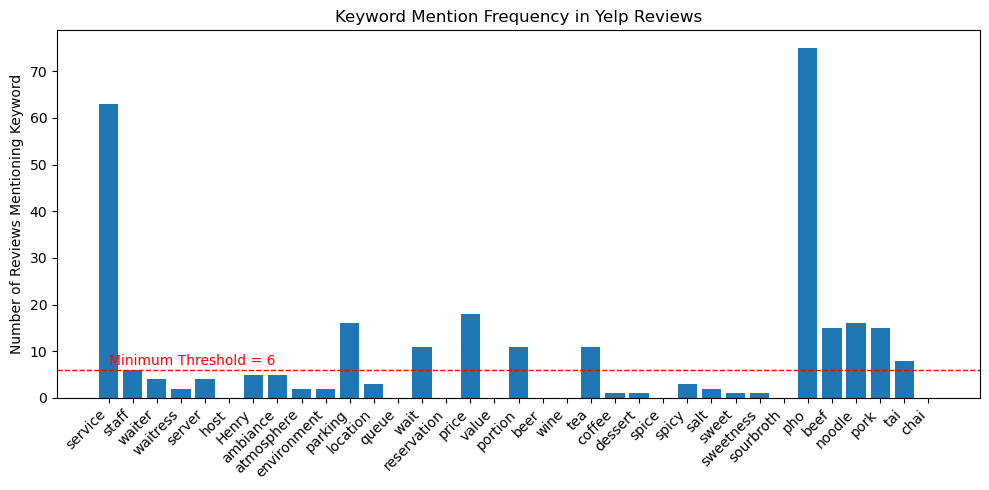

In [34]:
counts = [reviews_df['review']
          .str.contains(kw, case=False, na=False)
          .sum()
          for kw in potential_keywords]
min_reviews = 6
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(potential_keywords, counts)
ax.axhline(min_reviews, color='red', linestyle='--', linewidth=1)
ax.text(0, min_reviews + 0.5, 
        f'Minimum Threshold = {min_reviews}', 
        color='red', va='bottom')
ax.set_xticklabels(potential_keywords, rotation=45, ha='right')
ax.set_ylabel('Number of Reviews Mentioning Keyword')
ax.set_title('Keyword Mention Frequency in Yelp Reviews')
plt.tight_layout()
plt.show()

In [35]:
vietnamese_dishes = [
    "Cha Gio",
    "Nem Nuong Cha Ram",
    "Thit Nuong Cuon",
    "Goi Cuon",
    "Vegetarian Goi Cuon",
    "Bi Cuon",
    "Banh Xeo",
    "Vegetarian Banh Xeo",
    "Nem Nuong",
    "Tau Hu Ky",
    "Goi Tom Salad",
    "Goi Ga Salad",
    "Goi Bo Salad",
    "Ga Nuong Xa",
    "Bo Nuong",
    "Thit Nuong",
    "Suon Nuong",
    "Pho Dat Biet Xe Lua",
    "Pho Tai",
    "Pho Tai Gan",
    "Pho Tai Nam",
    "Pho Tai Sach",
    "Pho Ga",
    "Pho Bo Vien",
    "Soup Bo Vien",
    "Pho Tom",
    "Pho Thit Nuong",
    "Hu Tieu and Mi Bo Kho",
    "Pho Seafood",
    "Pho Chay",
    "Bun Thit Nuong, Bo Nuong, Ga Nuong",
    "Bun Cha Gio",
    "Bun Cha Gio Thit Nuong and Bun Bo Nuong",
    "Bun Cha Gio Tom Nuong",
    "Bun Tom Thit Nuong Bo Nuong",
    "Bun Tau Hu Ky Thit",
    "Bun Tau Hu Ky Thit Bo Nuong",
    "Bun Tau Hu Ky Nem Nuong",
    "Bun Ga Tom Nuong",
    "Bun Ga Nuong Cha Gio",
    "Bun Rieu",
    "Bun Bo Hue",
    "Bun Tau Hu Ky Ga Nuong",
    "Bun Tau Hu Ky Bo Ng",
    "Bun Xao Chay",
    "Banh Hoi Cha Gio Thit",
    "Banh Hoi Cha Gio Bo Nuong",
    "Banh Hoi Thit Bo Nuong",
    "Banh Hoi Tom Thit Bo Nuong",
    "Banh Hoi Tau Hu Ky Nem Nuong",
    "Banh Hoi Tom Ga Nuong",
    "Com Cha Thit",
    "Com Cha Bo Nuong",
    "Com Bi Cha Thit",
    "Com Bi Cha Bo Nuong",
    "Com Thit",
    "Com Bo Nuong",
    "Com Thit Nuong Nem Nuong",
    "Com Bi Cha Suon Nuong",
    "Com Suon Nuong",
    "Com Tau Hu Ky",
    "Com Suon Tau Hu Ky",
    "Com Tau Hu Ky Nem Nuong",
    "Com Tau Hu Ky Thit",
    "Com Tau Hu Ky Thit Bo Nuong",
    "Com Chien Tom",
    "Com Chien Ga Cay",
    "Com Ga Nuong Xa",
    "Com Ga Xao Xa Ot",
    "Com Chien Chay",
    "Com Chien Seafood La Que",
    "Com Bo Luc Lac",
    "Com Tom, Bo, and Ga Xao La Que Cay",
    "Com Chien Cua",
    "Nui Ga Nuong",
    "Com Tom Xao Xa Ot",
    "Com Bi Cha Ga Nuong",
    "Com Bo Nuong Nem Nuong"
]

english_dishes = [
    "egg rolls",
    "Summer rolls",
    "rolls.",
    "vegetable",
    "rice",
    "fried rice",
    "filet mignon",
    "tofu",
    'chicken',
    'pork',
    "Spring rolls and vegetables.",
    "Shredded pork and vegetables rolls.",
    "Vietnamese crepe with shrimp and pork.",
    "Vietnamese crepe.",
    "Grilled pork meatball. Served with vegetables and rice paper.",
    "Bean curd shrimp paste. Served with vegetables.",
    "Shrimp sour salad.",
    "Chicken sour salad.",
    "Beef sour salad.",
    "Grilled lemongrass chicken with vegetables and rice paper.",
    "Grilled beef with vegetables and rice paper.",
    "Grilled pork with vegetables and rice paper.",
    "Grilled pork chop with vegetables.",
    "Special combo with filet mignon steak, flank, tendon, tripe and brisket.",
    "Filet mignon steak.",
    "Filet mignon steak and tendon.",
    "Filet mignon steak and well done flank.",
    "Filet mignon steak and tripe.",
    "Chicken with beef broth.",
    "Beef balls noodle soup.",
    "Beef ball soup.",
    "Shrimp with rice noodle in beef broth.",
    "Grilled pork with rice noodle in beef broth.",
    "Beef stew with rice noodle or egg noodle.",
    "Shrimp, squid, and amp fish balls with rice noodle in beef broth.",
    "Tofu and vegetable noodle in vegetable broth.",
    "Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Vietnamese egg rolls. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Egg rolls served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Egg rolls and shrimp. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Shrimp. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Fried bean curd shrimp paste with grilled beef. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Fried bean curd shrimp paste with grilled pork. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Fried bean curd shrimp paste and grilled pork meatball. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Grilled chicken and shrimp.",
    "Grilled chicken and egg rolls. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Crab meat, shrimp, and pork with vermicelli soup. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Hue’s style spicy beef soup with pork leg, meatball, beef shank, and large vermicelli.",
    "Fried bean curd shrimp paste with grilled chicken and vermicelli.",
    "Grilled beef and shrimp paste. Served with salad, garden herbs, cilantro, bean sprouts, pickled carrot, peanuts, and fish sauce.",
    "Tofu and vegetables with vermicelli.",
    "Egg rolls and grilled pork. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Egg rolls and grilled beef. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Grilled pork or beef. Grilled pork. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Grilled shrimp and pork or beef. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Grilled meat ball and fried bean curd shrimp paste. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Grilled shrimp and chicken. Served with salad, garden herbs, cilantro, picked carrot, peanuts, and fish sauce.",
    "Grilled pork and egg loaf rice. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled pork and egg loaf rice. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Shredded pork, egg loaf, and grilled pork. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Shredded pork, egg loaf, and grilled beef. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled pork. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled beef. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled pork and grilled pork meatball. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled pork and grilled pork meatball. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled pork chop. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Fried bean curd shrimp paste. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Pork chop and bean curd shrimp paste. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled meat ball and bean curd shrimp paste. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Bean curd shrimp paste and grilled pork. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Bean curd shrimp paste and grilled beef. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Fried rice with shrimp spicy. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Fried rice with shrimp spicy. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled lemongrass chicken. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Lemongrass chicken and chili. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Vegetarian tofu fried rice. Served with salad, slice of cucumber, and tomatoes.",
    "Seafood fried rice with basil leaves. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Diced beef steak on red rice or macaroni. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Shrimp and spicy basil on steamed rice. Thailand style. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Crab meat fried rice. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Grilled chicken with macaroni. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Shrimp with lemongrass chili sauce. Served with salad, slice of cucumber, tomatoes, and fish sauce.",
    "Shredded pork, egg loaf, and grilled chicken with steam rice.",
    "Grilled beef and grilled pork meatball. Served with salad, slice of cucumber, tomatoes, and fish sauce."
]

In [36]:
def kw_sentiment(kw):
    sents = []
    mask = reviews_df['review'].str.contains(kw, case=False, na=False)
    for txt in reviews_df.loc[mask, 'review']:
        for s in sent_tokenize(txt):
            if kw.lower() in s.lower():
                sents.append(sia.polarity_scores(s)['compound'])
    return sents

In [37]:
for dish in vietnamese_dishes:
    count = reviews_df['review'].str.contains(dish, case=False, na=False).sum()
    if count >= 5:
        print(f"{dish!r}: {count} reviews")
viet_scores = { dish: kw_sentiment(kw) for dish in vietnamese_dishes }

for dish in english_dishes:
    count = reviews_df['review'].str.contains(dish, case=False, na=False).sum()
    if count >= 5:
        print(f"{dish!r}: {count} reviews")
eng_scores = { dish: kw_sentiment(kw) for dish in english_dishes }

'Banh Xeo': 5 reviews
'Pho Tai': 5 reviews
'Bun Rieu': 8 reviews
'Bun Bo Hue': 12 reviews
'egg rolls': 14 reviews
'rolls.': 25 reviews
'rice': 28 reviews
'chicken': 6 reviews
'pork': 15 reviews


In [38]:
keywords = ['service','staff','wait','Henry','portion','parking','pho','beef','broth','noodle','tea','price',
           'pork','tai','Bun Bo Hue','Banh Xeo','chicken','rice','roll','egg roll','bun','banh']
for kw in keywords:
    count = reviews_df['review'].str.contains(kw, case=False, na=False).sum()
    print(f"{kw!r}: {count} reviews")
kw_scores = { kw: kw_sentiment(kw) for kw in keywords }

'service': 63 reviews
'staff': 6 reviews
'wait': 11 reviews
'Henry': 5 reviews
'portion': 11 reviews
'parking': 16 reviews
'pho': 75 reviews
'beef': 15 reviews
'broth': 23 reviews
'noodle': 16 reviews
'tea': 11 reviews
'price': 18 reviews
'pork': 15 reviews
'tai': 8 reviews
'Bun Bo Hue': 12 reviews
'Banh Xeo': 5 reviews
'chicken': 6 reviews
'rice': 28 reviews
'roll': 33 reviews
'egg roll': 19 reviews
'bun': 19 reviews
'banh': 8 reviews


In [39]:
data = {}
for keyword, scores in kw_scores.items():
    series = pd.Series(scores)
    data[keyword] = series
kw_df = pd.DataFrame(data)
kw_df

service   staff    wait   Henry  portion  parking     pho    beef  \
0     0.1280 -0.1027  0.0000  0.6249   0.4404   0.0772  0.0000  0.0000   
1     0.8016  0.6997  0.0000  0.8360   0.5106   0.0000  0.6586  0.6586   
2     0.6249  0.7184  0.4588  0.5520   0.0000   0.4404  0.5400  0.8955   
3     0.4939  0.4019 -0.2960  0.7717   0.5563   0.4404  0.4939  0.4019   
4     0.4404  0.6249  0.2960  0.8622   0.6070   0.3182  0.0000  0.5413   
..       ...     ...     ...     ...      ...      ...     ...     ...   
117      NaN     NaN     NaN     NaN      NaN      NaN  0.4404     NaN   
118      NaN     NaN     NaN     NaN      NaN      NaN  0.0000     NaN   
119      NaN     NaN     NaN     NaN      NaN      NaN -0.1027     NaN   
120      NaN     NaN     NaN     NaN      NaN      NaN -0.7403     NaN   
121      NaN     NaN     NaN     NaN      NaN      NaN -0.6759     NaN   

      broth  noodle  ...    pork     tai  Bun Bo Hue  Banh Xeo  chicken  \
0    0.7935  0.6586  ...  0.0000  0.0000     -0.3412    0.0000   0.5106   
1    0.8955  0.5719  ...  0.6211  0.8070      0.8466    0.7506   0.7034   
2    0.7707  0.1280  ...  0.2023  0.6705      0.5400    0.7506   0.5563   
3    0.0000  0.0000  ...  0.0000  0.0000      0.6865    0.4939   0.0000   
4    0.0000  0.0000  ...  0.0000  0.0000      0.3976    0.5994   0.0000   
..      ...     ...  ...     ...     ...         ...       ...      ...   
117     NaN     NaN  ...     NaN     NaN         NaN       NaN      NaN   
118     NaN     NaN  ...     NaN     NaN         NaN       NaN      NaN   
119     NaN     NaN  ...     NaN     NaN         NaN       NaN      NaN   
120     NaN     NaN  ...     NaN     NaN         NaN       NaN      NaN   
121     NaN     NaN  ...     NaN     NaN         NaN       NaN      NaN   

       rice    roll  egg roll     bun    banh  
0    0.5994  0.0000    0.0000  0.7935  0.0000  
1    0.7935  0.0000    0.0000 -0.3412  0.7506  
2    0.1280  0.0000    0.0000  0.8466  0.7506  
3    0.4939  0.6211    0.6211  0.5400  0.4939  
4   -0.3071  0.0000    0.0000  0.0000  0.5994  
..      ...     ...       ...     ...     ...  
117     NaN     NaN       NaN     NaN     NaN  
118     NaN     NaN       NaN     NaN     NaN  
119     NaN     NaN       NaN     NaN     NaN  
120     NaN     NaN       NaN     NaN     NaN  
121     NaN     NaN       NaN     NaN     NaN  

[122 rows x 22 columns]

In [40]:
avg_kw = {kw: np.mean(v) for kw,v in kw_scores.items() if v}
print(avg_kw)

{'service': np.float64(0.47253636363636364), 'staff': np.float64(0.3903666666666667), 'wait': np.float64(0.17714615384615387), 'Henry': np.float64(0.72936), 'portion': np.float64(0.4963846153846155), 'parking': np.float64(0.19101666666666667), 'pho': np.float64(0.3177614754098361), 'beef': np.float64(0.32928749999999996), 'broth': np.float64(0.4166148148148147), 'noodle': np.float64(0.40746111111111116), 'tea': np.float64(0.2401076923076923), 'price': np.float64(0.22674230769230774), 'pork': np.float64(0.253488), 'tai': np.float64(0.2617888888888889), 'Bun Bo Hue': np.float64(0.3682066666666666), 'Banh Xeo': np.float64(0.34552), 'chicken': np.float64(0.2243363636363636), 'rice': np.float64(0.22916153846153847), 'roll': np.float64(0.304458), 'egg roll': np.float64(0.27383666666666673), 'bun': np.float64(0.394096), 'banh': np.float64(0.40705)}


In [41]:
# how many sentences vs. average/median sentiment per item
summary = kw_df.agg(['count','mean','median','std']).T
summary.columns = ['mentions','avg_sent','median_sent','std_sent']
summary.sort_values('mentions', ascending=False)

mentions  avg_sent  median_sent  std_sent
pho            122.0  0.317761      0.44040  0.402408
service         66.0  0.472536      0.61140  0.393095
roll            50.0  0.304458      0.31115  0.348926
rice            39.0  0.229162      0.11540  0.365313
egg roll        30.0  0.273837      0.00000  0.376058
broth           27.0  0.416615      0.44040  0.349489
price           26.0  0.226742      0.05770  0.366237
pork            25.0  0.253488      0.00000  0.288493
bun             25.0  0.394096      0.44970  0.368882
parking         18.0  0.191017      0.07720  0.445594
noodle          18.0  0.407461      0.44040  0.320918
beef            16.0  0.329287      0.38155  0.351447
Bun Bo Hue      15.0  0.368207      0.44970  0.398437
banh            14.0  0.407050      0.47575  0.302543
tea             13.0  0.240108      0.00000  0.308811
portion         13.0  0.496385      0.51060  0.323879
wait            13.0  0.177146      0.00000  0.314165
chicken         11.0  0.224336      0.40190  0.511400
Banh Xeo        10.0  0.345520      0.43035  0.317665
tai              9.0  0.261789      0.00000  0.330300
staff            6.0  0.390367      0.51340  0.361644
Henry            5.0  0.729360      0.77170  0.135259

In [42]:
def plot_sentiment_violin(df, keyword, n_cols=2, color='dodgerblue'):
    '''Violin Plot for aspects (keyword), with: custom grid (default: 2 cols), color (default: royalblue)'''
    n = len(keywords)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    axes = axes.flatten() if n > 1 else [axes]
    for ax, kw in zip(axes, keywords):
        data = df[kw].dropna()
        vp = ax.violinplot(data, showmeans=False, showmedians=True)
        for body in vp['bodies']:
            body.set_facecolor(color)
            body.set_edgecolor('black')
            body.set_alpha(0.7)
        vp['cmedians'].set_color('black')
        vp['cmedians'].set_linewidth(1.5)
        ax.set_title(f'Violin Plot for {kw}')
        ax.set_ylabel('Sentiment Score')
        ax.set_xticks([1])
        ax.set_xticklabels([f'Mentions for "{kw}"'])
    for ax in axes[n:]:
        ax.axis('off')
    fig.tight_layout()
    plt.show()

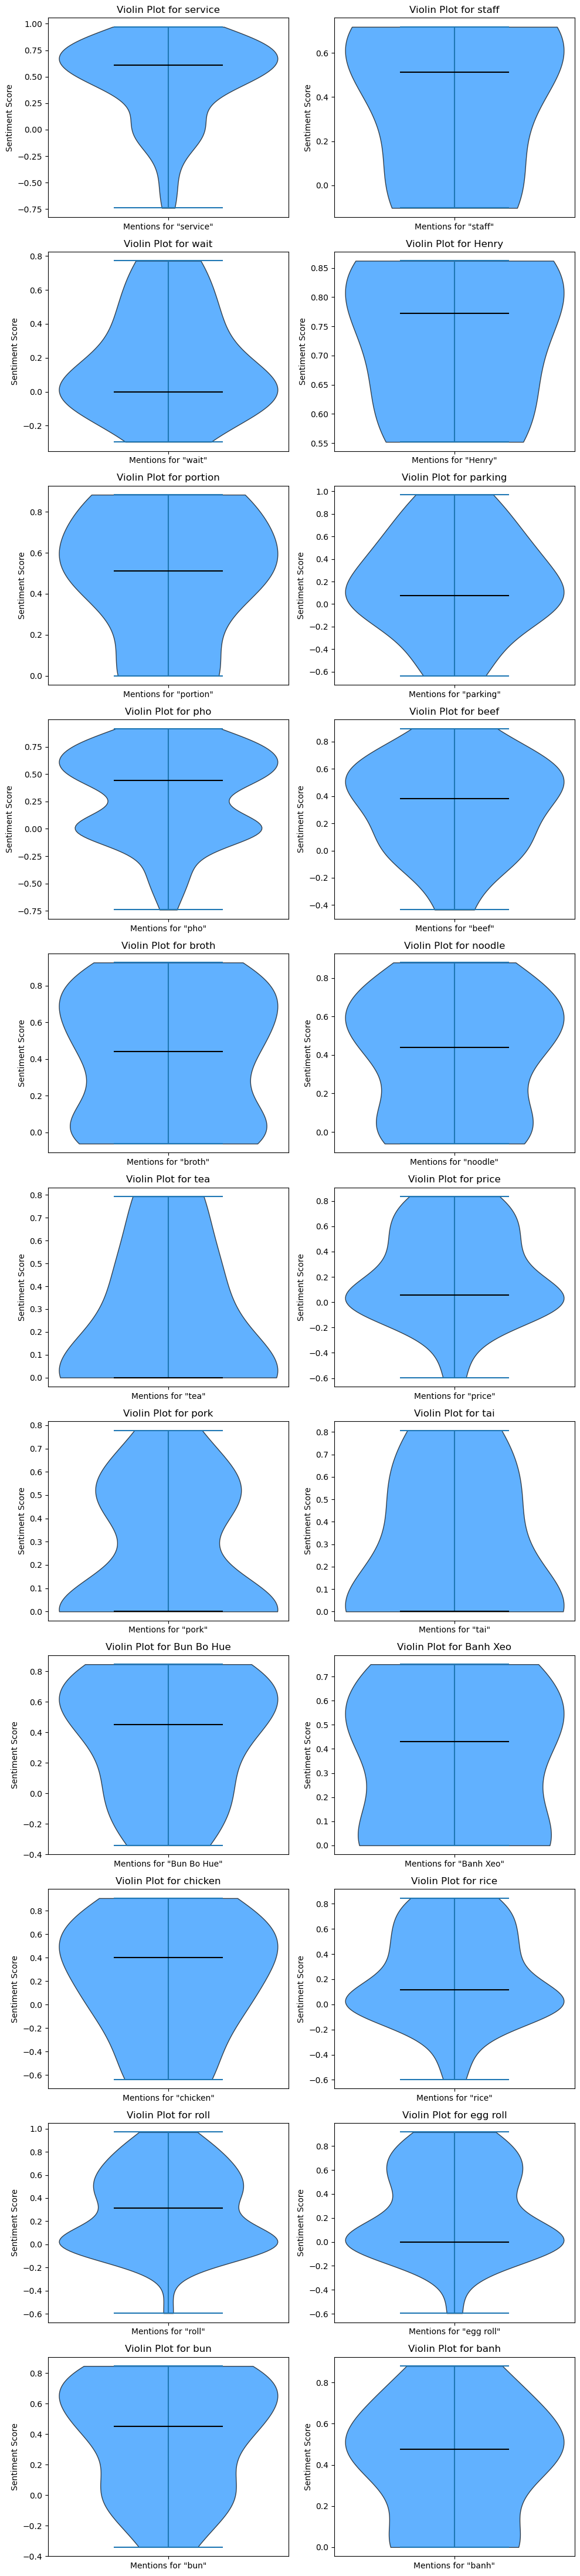

In [43]:
plot_sentiment_violin(kw_df, ['pho', 'beef', 'noodle', 'broth'])

In [44]:
def plot_item_sentiment_bubble(df, keywords=None, size_scale=200, color='dodgerblue'):
    '''Bubble chart: sentiment vs frequency. Choose 1+ keywords. Customizable: size_scale, color'''
    if keywords is None:
        keywords = df.columns.tolist()
    summary = (df[keywords].agg(['count','mean','std']).T.rename(columns={'count':'mentions','mean':'avg_sent','std':'std_sent'}))
    x = summary['mentions']
    y = summary['avg_sent']
    sizes = (summary['std_sent'].fillna(0) * size_scale).clip(lower=20)  
    fig, ax = plt.subplots(figsize=(6,5))
    sc = ax.scatter(x, y, s=sizes, alpha=0.6, c=color, edgecolors='k')
    for kw in summary.index:
        ax.annotate(kw,
                    (summary.loc[kw,'mentions'], summary.loc[kw,'avg_sent']),
                    textcoords="offset points", xytext=(3,3))
    ax.set_xlabel('Number of Sentence Mentions')
    ax.set_ylabel('Average Sentiment Score')
    ax.set_title('Mentions vs. Avg Sentiment (bubble = stdev)')
    ax.set_ylim(-1.0, 1.0)
    ax.axhline(0, linewidth=0.7, color='black')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

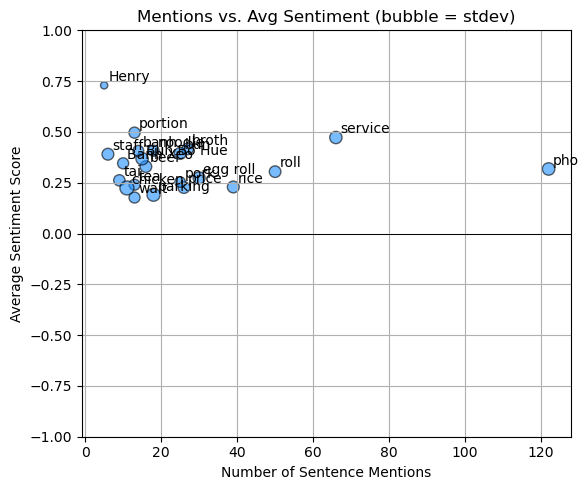

In [45]:
plot_item_sentiment_bubble(kw_df, keywords=keywords)

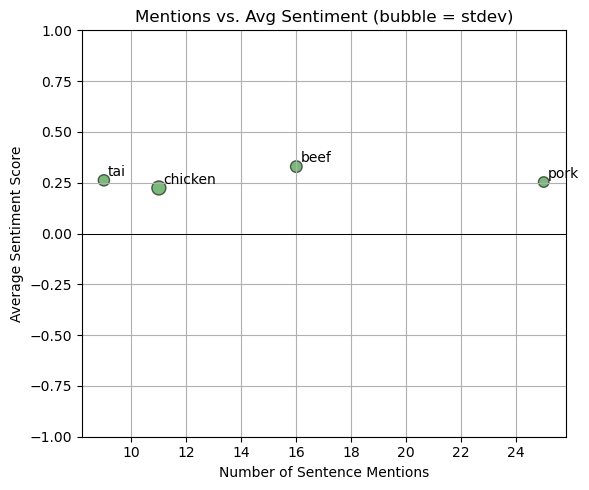

In [46]:
plot_item_sentiment_bubble(kw_df, keywords=['beef', 'pork', 'tai', 'chicken'], color='forestgreen')

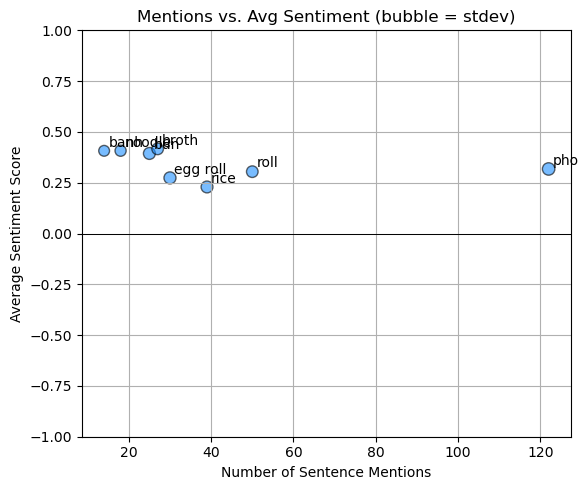

In [47]:
plot_item_sentiment_bubble(kw_df, keywords=['pho','noodle','rice','roll','egg roll','bun','banh','broth'])

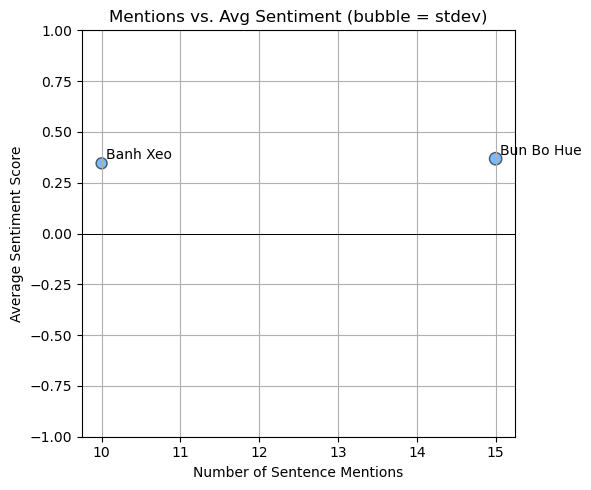

In [48]:
plot_item_sentiment_bubble(kw_df, keywords=['Bun Bo Hue','Banh Xeo'])

**EDA:**

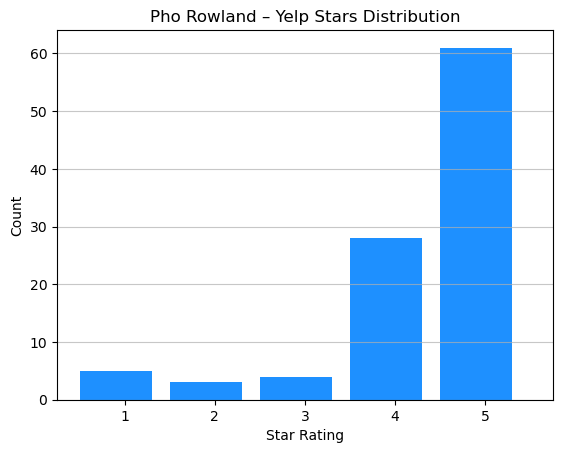

In [254]:
# Bar: Star Dist.
bins = np.arange(0.5, 5.5 + 1, 1)
plt.hist(reviews_df['stars'], color='dodgerblue', bins=bins, width=0.8)
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Pho Rowland – Yelp Stars Distribution')
plt.grid(axis='y', alpha=0.7)
plt.savefig('stars2.png', bbox_inches='tight')
plt.show()

In [229]:
import os
os.getcwd()

'/Users/showhq/Sentiment Analysis'

In [233]:
cd '/Users/showhq/Sentiment Analysis'

/Users/showhq/Sentiment Analysis


In [ ]:
mv stars2.png /Users/showhq/Sentiment Analysis/public/

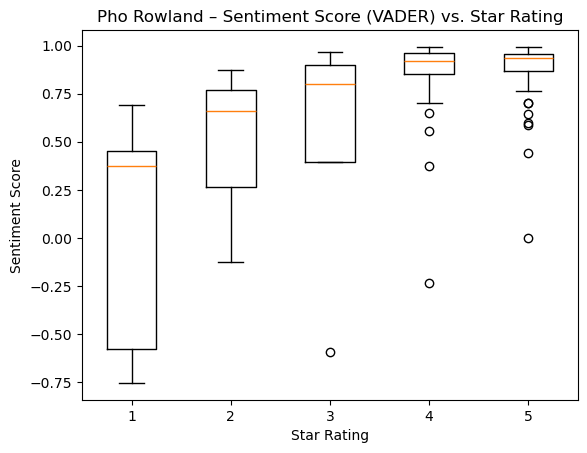

In [51]:
# Scatterplot: Sentiment Score vs Stars
data = [reviews_df.loc[reviews_df['stars']==i, 'sentiment_score'] for i in [1,2,3,4,5]]
plt.boxplot(data, labels=[1,2,3,4,5])
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.title('Pho Rowland – Sentiment Score (VADER) vs. Star Rating')
plt.show()

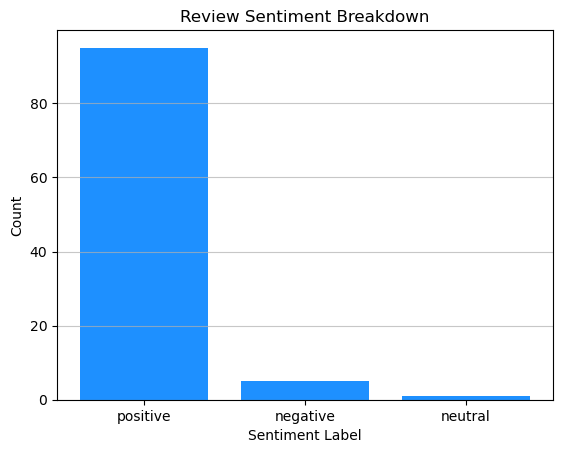

In [250]:
# Bar: Sentiment Label Dist.
counts = reviews_df['sentiment_label'].value_counts()
plt.bar(counts.index, counts.values, color='dodgerblue')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Review Sentiment Breakdown')
plt.grid(axis='y', alpha=0.7)
plt.show()

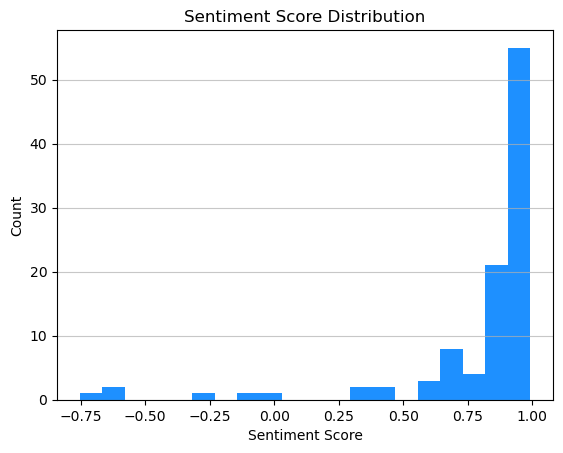

In [247]:
# Bar: Sentiment Score Dist.
plt.hist(reviews_df['sentiment_score'], color='dodgerblue', bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.grid(axis='y', alpha=0.7)
plt.savefig('sentiment_dist1.png', bbox_inches='tight')
plt.show()

**Interactive Plots**

Of the ones that are useful^^, will make them interactive

In [55]:
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import spacy
nlp=spacy.load("en_core_web_sm")

In [56]:
summary_bubble = (kw_df
           .agg(['count','mean','std'])
           .T
           .rename(columns={'count':'mentions','mean':'avg_sent','std':'std_sent'})
           .reset_index()
           .rename(columns={'index':'keyword'}))

bubble = alt.Chart(summary_bubble).mark_circle().encode(
    x=alt.X('mentions:Q', title='Number of Sentence Mentions'),
    y=alt.Y('avg_sent:Q', title='Average Sentiment Score'),
    size=alt.Size('std_sent:Q', title='Sentiment Std Dev', scale=alt.Scale(range=[100, 1000])),
    color=alt.value('dodgerblue'),
    tooltip=['keyword:N','mentions:Q','avg_sent:Q','std_sent:Q']).properties(
    title='Mentions vs. Avg Sentiment (bubble = std dev)',
    width=500,
    height=400).interactive()
bubble

alt.Chart(...)

In [57]:
summary_int_bubble = (kw_df
           .agg(['count','mean','std'])
           .T
           .rename(columns={'count':'mentions','mean':'avg_sent','std':'std_sent'})
           .reset_index()
           .rename(columns={'index':'keyword'}))
summary_int_bubble['avg_sent'] *= 100
summary_int_bubble['std_sent'] = summary['std_sent'].fillna(0) * 100
summary_int_bubble = summary_int_bubble[summary_int_bubble['mentions'] > 0]

In [58]:
fig = go.Figure()
for i, kw in enumerate(summary_int_bubble['keyword']):
    row = summary_int_bubble[summary_int_bubble['keyword'] == kw]
    fig.add_trace(go.Scatter(x=row['mentions'], y=row['avg_sent'],
                             mode='markers',
                             name=kw,
                             marker=dict(size=row['mentions'],
                                         sizemode='area',
                                         sizeref=2 * summary_int_bubble['mentions'].max() / (40. ** 2),
                                         sizemin=10,
                                         color=row['avg_sent'],
                                         colorscale='Blues',
                                         cmin=-100, cmax=100,
                                         opacity=0.7,
                                         showscale=(i == 0))))

buttons = [dict(label='All',
                method='update',
                args=[{'visible': [True] * len(summary_int_bubble)},
                      {'title': 'Mentions vs. Avg Sentiment (%)'}])]

for idx, kw in enumerate(summary_int_bubble['keyword']):
    vis = [False] * len(summary_int_bubble)
    vis[idx] = True
    buttons.append(dict(label=kw,
                        method='update',
                        args=[{'visible': vis},
                              {'title': f'Mentions vs. Avg Sentiment — {kw} (%)'}]))

max_m = summary_int_bubble['mentions'].max()
fig.update_layout(width=700, height=700,
                  margin=dict(l=60, r=60, t=80, b=60),
                  dragmode='pan',                  
                  updatemenus=[dict(active=0,
                                    buttons=buttons,
                                    x=0.65, y=1.15,
                                    xanchor='left', yanchor='top')],
                  xaxis=dict(title='Number of Sentence Mentions',
                             range=[0, max_m * 1.05],
                             rangeslider=dict(visible=True, range=[0, max_m * 1.05])),
                  yaxis=dict(title='Average Sentiment (%)',
                             range=[-100, 100],
                             zeroline=True, zerolinewidth=3, zerolinecolor='black',
                             scaleanchor='x', scaleratio=1),
                  title='Mentions vs. Avg Sentiment (%)',
                  showlegend=False)

fig.data[0].marker.colorbar.x = 1
fig.show(config={'modeBarButtonsToAdd': ['pan2d','zoom2d','zoomIn2d','zoomOut2d','autoScale2d','resetScale2d'],
                 'scrollZoom': True})

In [59]:
reviews_df_long = (kw_df
           .reset_index()
           .melt(id_vars='index', var_name='keyword', value_name='sentiment')
           .dropna(subset=['sentiment']))

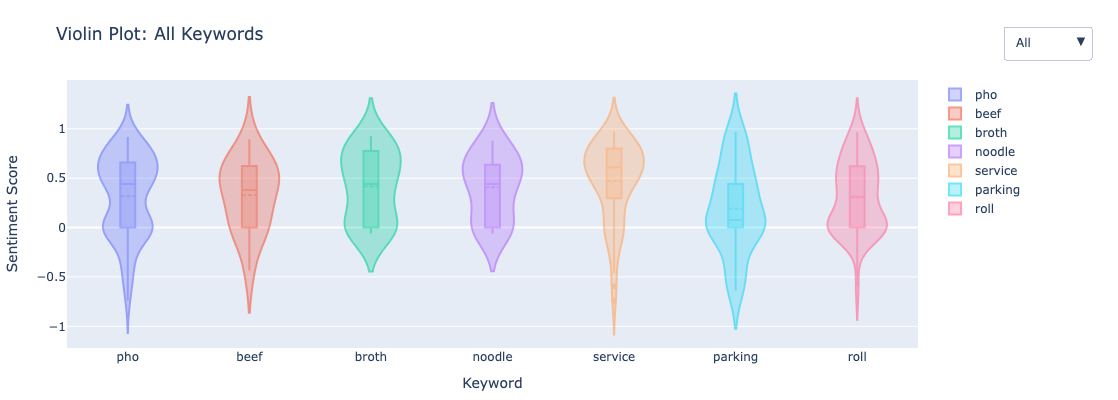

In [235]:
fig = go.Figure()
for kw in keywords:
    subset = reviews_df_long[reviews_df_long['keyword']==kw]
    fig.add_trace(go.Violin(x=subset['keyword'], y=subset['sentiment'], name=kw,
                            box_visible=True, meanline_visible=True, opacity=0.6, visible=True))

buttons = [dict(label='All', method='update',
                args=[{'visible':[True]*len(keywords)},
                      {'title':'Violin Plot: All Keywords'}])]

for i, kw in enumerate(keywords):
    vis=[False]*len(keywords); vis[i]=True
    buttons.append(dict(label=kw, method='update',
                        args=[{'visible':vis},
                              {'title':f'Violin Plot: {kw}'}]))

fig.update_layout(updatemenus=[dict(active=0, buttons=buttons,
                                    x=1.1, y=1.2, xanchor='left', yanchor='top')],
                  title='Violin Plot: All Keywords',
                  xaxis_title='Keyword', yaxis_title='Sentiment Score',
    width=800, height=400, margin=dict(l=50, r=200, t=80, b=50))
fig.show()

In [61]:
kw_df.head()

service   staff    wait   Henry  portion  parking     pho    beef   broth  \
0   0.1280 -0.1027  0.0000  0.6249   0.4404   0.0772  0.0000  0.0000  0.7935   
1   0.8016  0.6997  0.0000  0.8360   0.5106   0.0000  0.6586  0.6586  0.8955   
2   0.6249  0.7184  0.4588  0.5520   0.0000   0.4404  0.5400  0.8955  0.7707   
3   0.4939  0.4019 -0.2960  0.7717   0.5563   0.4404  0.4939  0.4019  0.0000   
4   0.4404  0.6249  0.2960  0.8622   0.6070   0.3182  0.0000  0.5413  0.0000   

   noodle  ...    pork     tai  Bun Bo Hue  Banh Xeo  chicken    rice    roll  \
0  0.6586  ...  0.0000  0.0000     -0.3412    0.0000   0.5106  0.5994  0.0000   
1  0.5719  ...  0.6211  0.8070      0.8466    0.7506   0.7034  0.7935  0.0000   
2  0.1280  ...  0.2023  0.6705      0.5400    0.7506   0.5563  0.1280  0.0000   
3  0.0000  ...  0.0000  0.0000      0.6865    0.4939   0.0000  0.4939  0.6211   
4  0.0000  ...  0.0000  0.0000      0.3976    0.5994   0.0000 -0.3071  0.0000   

   egg roll     bun    banh  
0    0.0000  0.7935  0.0000  
1    0.0000 -0.3412  0.7506  
2    0.0000  0.8466  0.7506  
3    0.6211  0.5400  0.4939  
4    0.0000  0.0000  0.5994  

[5 rows x 22 columns]

In [62]:
aspect_to_category={'service':'Employees','staff':'Employees','wait':'Employees','Henry':'Employees',
                    'parking':'Parking',
                    'pho':'Dishes','Bun Bo Hue':'Dishes','Banh Xeo':'Dishes','egg roll':'Dishes',
                    'bun':'Dishes','banh':'Dishes','portion':'Dishes','roll':'Dishes',
                    'beef':'Ingredients','pork':'Ingredients','chicken':'Ingredients',
                    'rice':'Ingredients','noodle':'Ingredients','broth':'Ingredients','tai':'Ingredients'}

In [63]:
reviews_long=reviews_df.melt(var_name='aspect',value_name='value')
reviews_long['category']=reviews_long['aspect'].map(aspect_to_category)
mentions=reviews_long[reviews_long['value']!=0]
counts=mentions.groupby(['category','aspect']).size().reset_index(name='count')
reviews_long, mentions, counts

(      aspect                                              value category
 0     review  This place was so good! I came here with a fri...      NaN
 1     review  Pretty solid place to get Vietnamese food! I o...      NaN
 2     review  Pho prices are getting out of hand. $17 for 3 ...      NaN
 3     review  This Vietnamese restaurant is excellent! This ...      NaN
 4     review  Came here after a rainy day & it hit the spot!...      NaN
 ..       ...                                                ...      ...
 601  emotion                                              trust      NaN
 602  emotion                                           positive      NaN
 603  emotion                                           positive      NaN
 604  emotion                                           positive      NaN
 605  emotion                                           positive      NaN
 
 [606 rows x 3 columns],
       aspect                                              value category
 0     revi

In [64]:
aspect_counts=(reviews_df.notna() & reviews_df!=0).sum().rename_axis('aspect').reset_index(name='count')
aspect_counts['category']=aspect_counts['aspect'].map(aspect_to_category)
aspect_counts=aspect_counts.dropna(subset=['category'])
aspect_counts

Empty DataFrame
Columns: [aspect, count, category]
Index: []

In [67]:
def top_emotion(txt):
    emo = NRCLex(txt)
    return emo.top_emotions[0][0] if emo.top_emotions else 'none'

reviews_df['emotion'] = reviews_df['review'].apply(top_emotion)

In [68]:
emotion_counts = reviews_df['emotion'].value_counts().rename_axis('emotion').reset_index(name='count')
emotion_counts


emotion  count
0      positive     67
1         trust     20
2          fear      6
3  anticipation      4
4      negative      2
5      surprise      1
6         anger      1

In [69]:
data = emotion_counts.to_dict(orient='records')
alt.Chart(alt.Data(values=data)).mark_bar().encode(
    x=alt.X('emotion:N',sort='-y',title='Emotion'),
    y=alt.Y('count:Q',title='Number of Reviews'),
    tooltip=[alt.Tooltip('emotion:N'),alt.Tooltip('count:Q')]
).properties(title='Distribution of Top Emotions in Reviews')

alt.Chart(...)

In [70]:
fig=go.Figure()
for emo,count in emotion_counts.values:
    fig.add_trace(go.Bar(name=emo,x=[emo],y=[count]))
buttons=[dict(label='All',
              method='update',
              args=[{'visible':[True]*len(fig.data)}])]
for emo in emotion_counts['emotion']:
    visible=[t.name==emo for t in fig.data]
    buttons.append(dict(label=emo,
                        method='update',
                        args=[{'visible':visible}]))
fig.update_layout(barmode='stack',
                  updatemenus=[dict(buttons=buttons,
                                    direction='down')])
fig.show()

In [71]:
avg_compound=reviews_df.groupby('emotion')['sentiment_score'].mean().reset_index()
fig=px.bar(avg_compound,
           x='emotion',y='sentiment_score',
           title='Average Compound Score by Emotion',
           labels={'sentiment_score':'Avg Compound Score','emotion':'Emotion'})
fig.show()

This chart is just showing the average VADER “compound” score (–1 fully negative to +1 fully positive) for each NRC-lexicon emotion bucket. In plain terms:

Anticipation reviews score highest (~0.86), meaning people talking about looking forward to things tend to use very positive wording.

Positive and Trust are also up near ~0.8, as you’d expect—those emotions co-occur with upbeat language.

Fear and Surprise sit in the middle (~0.4–0.75), so those reviews are mixed but generally more positive than negative.

The Negative bucket has the lowest mean (~0.15), confirming those reviews use more critical or downbeat words.

Anger only appears once (count=1), so its mean (~0.88) is misleading—too few samples to trust that number.

**Word Clouds:** gonna explore word counts–– good be good for glance insights

In [74]:
from wordcloud import WordCloud
import matplotlib.cm as cm
from collections import defaultdict

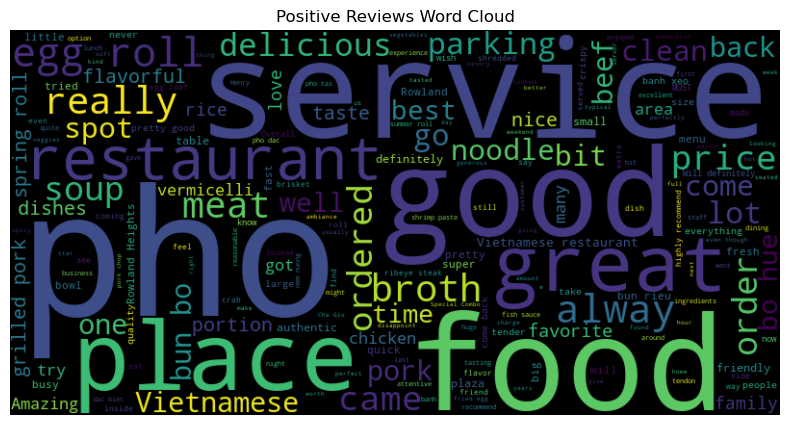

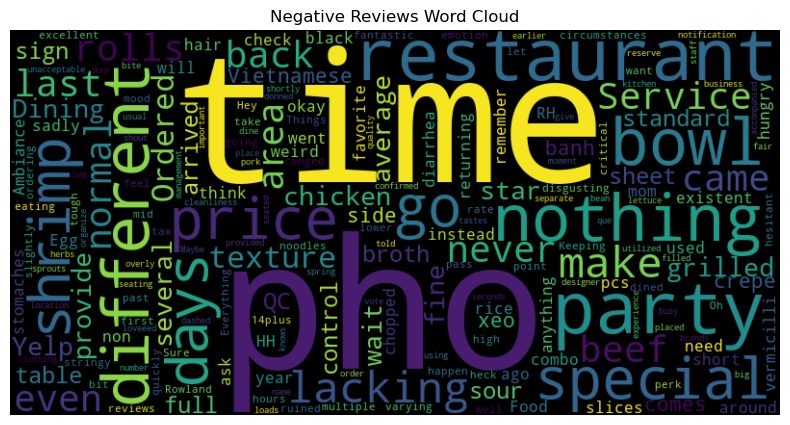

In [75]:
pos_text=" ".join(reviews_df.loc[reviews_df['sentiment_score']>0,'review'])
neg_text=" ".join(reviews_df.loc[reviews_df['sentiment_score']<0,'review'])

wc=WordCloud(width=800,height=400).generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

wc=WordCloud(width=800,height=400).generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

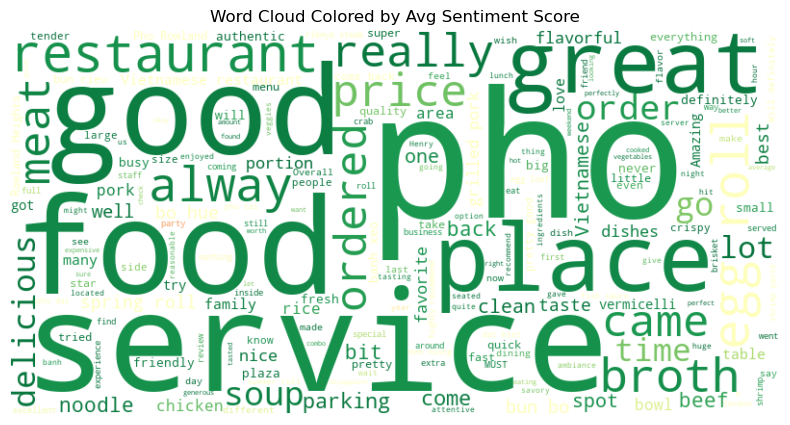

In [76]:
scores=defaultdict(list)
for txt,score in zip(reviews_df['review'],reviews_df['sentiment_score']):
    for w in txt.split():
        scores[w.lower()].append(score)
word_sentiment={w:sum(v)/len(v) for w,v in scores.items()}

def color_func(word, *args, **kwargs):
    # normalize -1→1 to 0→1
    norm=(word_sentiment.get(word.lower(),0)+1)/2
    r,g,b,_=cm.RdYlGn(norm)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

text=" ".join(reviews_df['review'])
wc=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc.recolor(color_func=color_func),interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Colored by Avg Sentiment Score')
plt.show()

In [77]:
# compute avg sentiment per word
scores=defaultdict(list)
for txt,score in zip(reviews_df['review'],reviews_df['sentiment_score']):
    for w in txt.split():
        scores[w.lower()].append(score)
word_sentiment={w:sum(v)/len(v) for w,v in scores.items()}

def color_func(word,font_size,position,orientation,random_state=None,**kwargs):
    norm=(word_sentiment.get(word.lower(),0)+1)/2
    r,g,b,_=cm.RdYlGn(norm)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

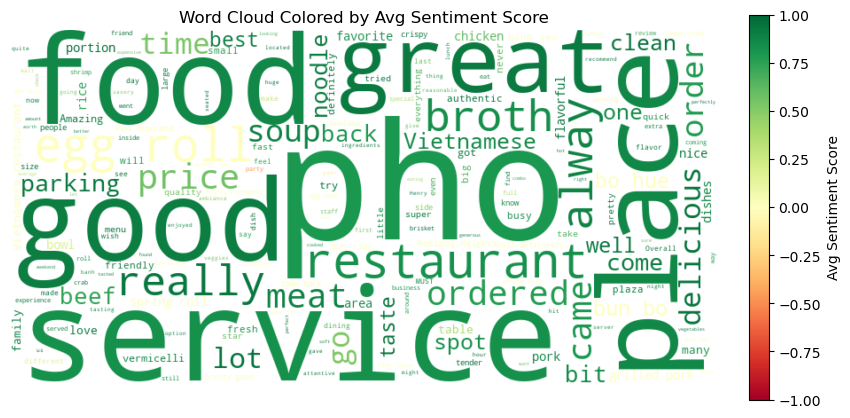

In [78]:
# Wordcloud: most positive words
text=" ".join(reviews_df['review'])
wc=WordCloud(width=800,height=400,background_color='white').generate(text)
norm=mpl.colors.Normalize(vmin=-1,vmax=1)
sm=mpl.cm.ScalarMappable(cmap='RdYlGn',norm=norm)
sm.set_array([])

# plot
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(wc.recolor(color_func=color_func),interpolation='bilinear')
ax.axis('off')
fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,label='Avg Sentiment Score')
plt.title('Word Cloud Colored by Avg Sentiment Score')
plt.show()

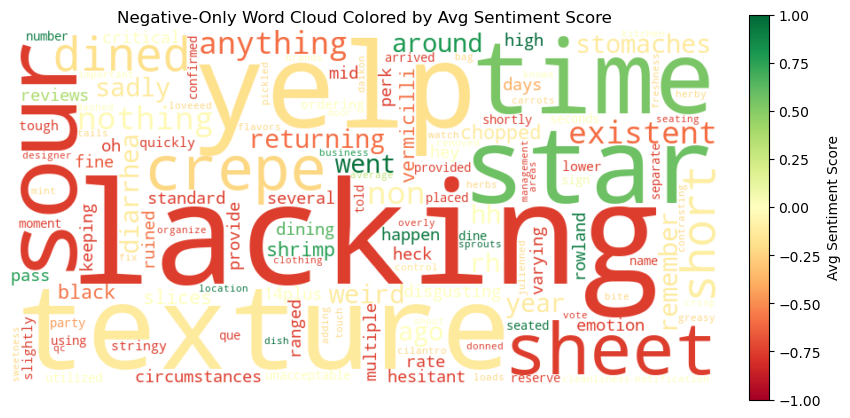

In [79]:
# Wordcloud: most negative words
neg_text=" ".join([w for w,s in word_sentiment.items() if s<0])
wc_neg=WordCloud(width=800,height=400,background_color='white').generate(neg_text)
norm=mpl.colors.Normalize(vmin=-1,vmax=1)
sm=cm.ScalarMappable(cmap='RdYlGn',norm=norm)
sm.set_array([])
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(wc_neg.recolor(color_func=color_func),interpolation='bilinear')
ax.axis('off')
fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,label='Avg Sentiment Score')
plt.title('Negative-Only Word Cloud Colored by Avg Sentiment Score')
plt.show()

In [93]:
analyzer=SentimentIntensityAnalyzer()
text=" ".join(reviews_df['review'])
freqs=WordCloud().process_text(text)

filtered_freq={w:cnt for w,cnt in freqs.items() if analyzer.lexicon.get(w,0)!=0}
lexicon_scores={w:analyzer.lexicon[w] for w in filtered_freq}

In [120]:
def lex_color(word,font_size,position,orientation,random_state=None,**kwargs):
    norm=(lexicon_scores.get(word.lower(),0)+1)/2
    r,g,b,_=cm.RdYlGn(norm)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

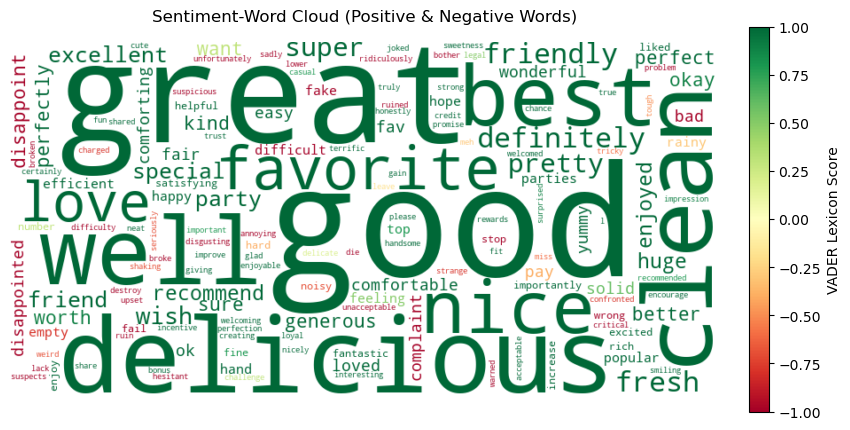

In [122]:
wc=WordCloud(width=800,height=400,background_color='white')
wc.generate_from_frequencies(filtered_freq)

norm=mpl.colors.Normalize(vmin=-1,vmax=1)
sm=cm.ScalarMappable(cmap='RdYlGn',norm=norm)
sm.set_array([])

fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(wc.recolor(color_func=lex_color),interpolation='bilinear')
ax.axis('off')
fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,
             label='VADER Lexicon Score')
plt.title('Sentiment-Word Cloud (Positive & Negative Words)',pad=15)
plt.show()


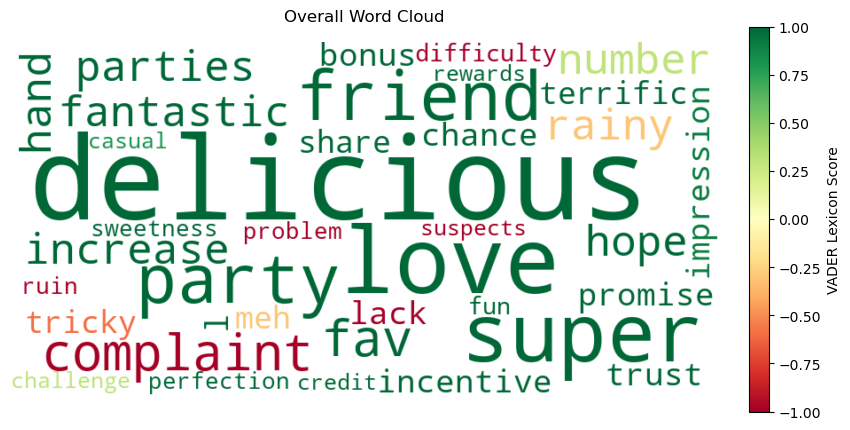

In [187]:
noun_freq={w:c for w,c in filtered_freq.items() if nlp(w)[0].pos_ in ("NOUN","PROPN")}
lexicon_nouns={w:analyzer.lexicon.get(w.lower(),0) for w in noun_freq}
wc=WordCloud(width=800,height=400,background_color='white')\
  .generate_from_frequencies(noun_freq)
norm=mpl.colors.Normalize(vmin=-1,vmax=1)
sm=cm.ScalarMappable(cmap='RdYlGn',norm=norm)
sm.set_array([])

fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(wc.recolor(color_func=lambda word,font_size,position,orientation,random_state=None,**kwargs:
    f'rgb{tuple(int(c*255) for c in cm.RdYlGn((lexicon_nouns.get(word.lower(),0)+1)/2)[:3])}'
),interpolation='bilinear')
ax.axis('off')
fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,
             label='VADER Lexicon Score')
plt.title('Overall Word Cloud',pad=15)
plt.show()

In [ ]:
keywords=['pho','beef','broth','noodle','service','parking','roll','spring','phoenix']
text=" ".join(reviews_df['review'])
freqs=WordCloud().process_text(text)
manual_freq={w:freqs[w] for w in keywords if w in freqs}

# 2) Compute each word’s avg review-based sentiment
from collections import defaultdict
word_sentiment=defaultdict(list)
for txt,score in zip(reviews_df['review'],reviews_df['sentiment_score']):
    for w in txt.split():
        lw=w.lower()
        if lw in manual_freq:
            word_sentiment[lw].append(score)
avg_sent={w: sum(v)/len(v) for w,v in word_sentiment.items()}

# 3) Color func using fixed vmin/vmax=[-1,1]
norm=mpl.colors.Normalize(vmin=-1,vmax=1)
def color_func(word,font_size,position,orientation,random_state=None,**kwargs):
    s=avg_sent.get(word.lower(),0)
    r,g,b,_=cm.RdYlGn((s+1)/2)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

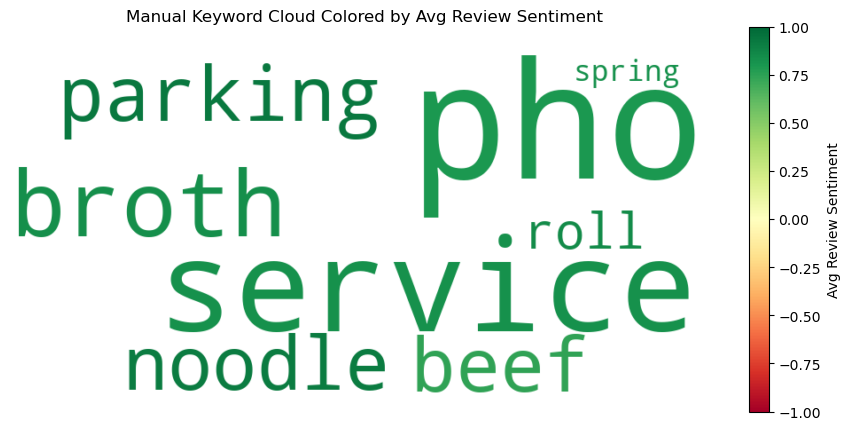

In [ ]:
sm=cm.ScalarMappable(cmap='RdYlGn',norm=norm)
sm.set_array([])
wc=WordCloud(width=800,height=400,background_color='white')\
  .generate_from_frequencies(manual_freq)
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(wc.recolor(color_func=color_func),interpolation='bilinear')
ax.axis('off')
fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,
             label='Avg Review Sentiment')
plt.title('Manual Keyword Cloud Colored by Avg Review Sentiment',pad=15)
plt.show()

Great–– now time to make word clouds generatable with any keywords

In [157]:
def keyword_color_func(word,font_size,position,orientation,random_state=None,**kwargs):
    '''For given words, will color them in (greener pos; redder neg; gray for non-present in reviews_df'''
    lw=word.lower()
    if raw_freqs.get(lw,0)==0:
        return 'rgb(128,128,128)'
    s=avg_sent.get(lw,0)
    r,g,b,_=cm.RdYlGn((s+1)/2)
    return f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

In [166]:
def plot_keyword_cloud(keywords,title='Keyword Cloud'):
    global raw_freqs, avg_sent
    text=" ".join(reviews_df['review'])
    words=re.findall(r"\b\w+\b",text.lower())
    raw_freqs=Counter(words)
    kl=[w.lower() for w in keywords]
    freqs={w:raw_freqs.get(w,0) or 1 for w in kl}
    word_sent=defaultdict(list)
    for txt,score in zip(reviews_df['review'],reviews_df['sentiment_score']):
        for w in re.findall(r"\b\w+\b",txt.lower()):
            if w in kl:
                word_sent[w].append(score)
    avg_sent={w:sum(v)/len(v) for w,v in word_sent.items()}
    wc=WordCloud(width=800,height=400,background_color='white')\
      .generate_from_frequencies(freqs)
    norm=mpl.colors.Normalize(vmin=-1,vmax=1)
    sm=cm.ScalarMappable(cmap='RdYlGn',norm=norm)
    sm.set_array([])
    fig,ax=plt.subplots(figsize=(10,5))
    ax.imshow(wc.recolor(color_func=keyword_color_func),interpolation='bilinear')
    ax.axis('off')
    fig.colorbar(sm,ax=ax,orientation='vertical',fraction=0.046,pad=0.04,
                 label='Avg Review Sentiment')
    plt.title(title,pad=15)
    fig.text(0.5,0.01,'Gray words were not present in the reviews',ha='center',fontsize=10)
    plt.show()

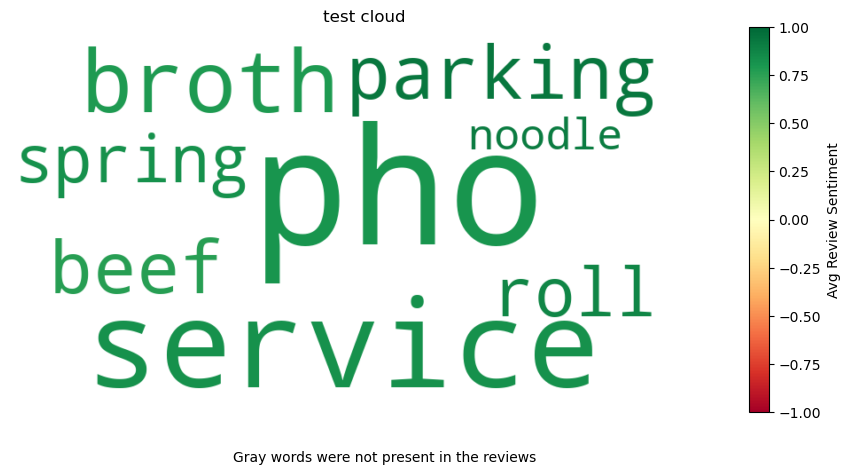

In [178]:
plot_keyword_cloud(['pho','beef','broth','service','noodle','parking','roll','spring'],
                   title='test cloud')

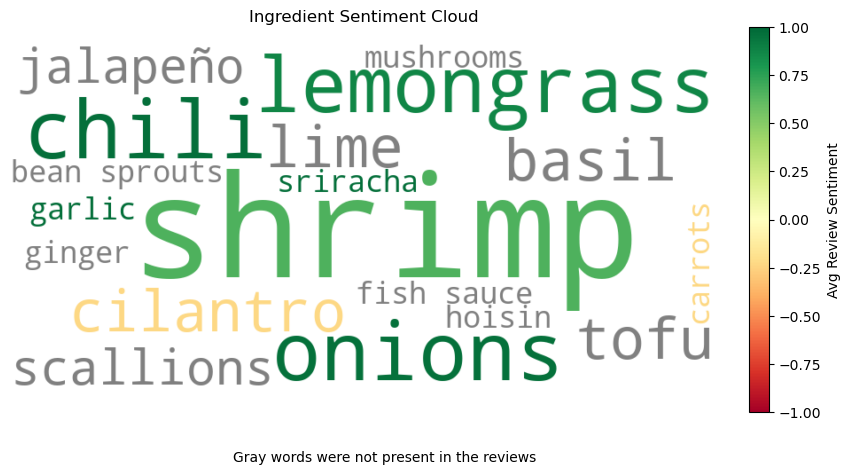

In [179]:
# ingredient-focused cloud
plot_keyword_cloud(['tofu', 'shrimp', 'basil', 'cilantro', 'lime', 'scallions', 'jalapeño', 'bean sprouts', 'garlic',
                    'ginger', 'mushrooms', 'carrots', 'onions', 'chili', 'fish sauce', 'hoisin', 'sriracha', 'lemongrass'],
                   title='Ingredient Sentiment Cloud')

some words don't appear in sample => wonder if those can be gray'd out^^

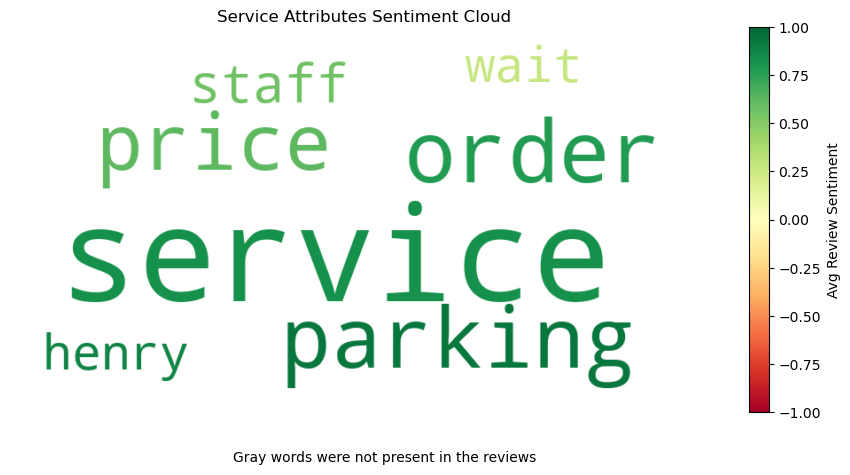

In [183]:
# service-focused cloud
plot_keyword_cloud(['service','staff','parking','wait','order','price','Henry'],
                   title='Service Attributes Sentiment Cloud')

In [216]:
reviews_df = reviews_df.reset_index().rename(columns={'index':'review_id'})
kw_df = kw_df.reset_index().rename(columns={'index':'review_id'})
combined = reviews_df.merge(kw_df, on='review_id', how='left')
combined.to_csv('/Users/showhq/Documents/GitHub/PhoRowland-Yelp-Analysis/public/pho_rowland.csv', index=False)

In [220]:
# combined['review'] = combined['review'].str.replace(r'[\r\n]+', ' ', regex=True)
# combined.to_csv(
#    '/Users/showhq/Documents/GitHub/PhoRowland-Yelp-Analysis/public/pho_rowland.csv',
#    index=False
# )